# GFP Group A - Hamburg Team 1

Video Games Sales & Ratings Dataset:</br>
https://www.kaggle.com/datasets/kendallgillies/video-game-sales-and-ratings

# POV / Scenario
Sebagai data analyst consultant sebuah perusahaan developer game. Perusahaan berencana untuk meluncurkan game baru tahun mendatang, sebagai DA perlu memahami preferensi user dan tren pasar dan memberikan insight/rekomendasi kepada tim bisnis.

# Business question yang digenerate (summary):
1. Apa saja platform game yang paling banyak digunakan di masing-masing negara/global dengan penjualan tertinggi?
(bisa per tahun/dibagi per beberapa tahun)</br>
2. Apa saja genre game yang paling diminati oleh pengguna di masing-masing negara/global dengan penjualan tinggi?
(bisa per tahun/dibagi per beberapa tahun)</br>
3. Apa saja rating ESRB yang paling cocok untuk target user di masing-masing negara/global dengan penjualan tertinggi?</br>
4. Apa saja tren (sales 5-10 tahun terakhir/bisa lebih) game dan preferensi (platform, genre) pengguna yang dapat dijadikan acuan untuk merencanakan pengembangan game?</br>
5. Apa saja game yang paling banyak diulas oleh kritikus atau user?</br>
6. Apa saja (negara/genre/platform) yang menunjukkan potensi penjualan game yang belum dioptimalkan?</br>
7. Apa ada korelasi antara rating (kritikus, user) terhadap penjualan game?"

# About Dataset

Context

This data set contains a list of video games with sales greater than 100,000 copies along with critic and user ratings. It is a combined web scrape from VGChartz and Metacritic along with manually entered year of release values for most games with a missing year of release. The original coding was created by Rush Kirubi and can be found here, but it limited the data to only include a subset of video game platforms. Not all of the listed video games have information on Metacritic, so there data set does have missing values.

# Data Dictionary

**Name** - The game's name </br>
**Platform** - Platform of the games release </br>
**Year_of_Release** - Year of the game's release</br>
**Genre** - Genre of the game</br>
**Publisher** - Publisher of the game</br>
**NA_Sales** - Sales in North America (in millions)</br>
**EU_Sales** - Sales in Europe (in millions)</br>
**JP_Sales** - Sales in Japan (in millions)</br>
**Other_Sales** - Sales in the rest of the world (in millions)</br>
**Global_Sales** - Total worldwide sales (in millions)</br>
**Critic_score** - Aggregate score compiled by Metacritic staff</br>
**Critic_count** - The number of critics used in coming up with the critic score</br>
**User_score** - Score by Metacritic's subscribers</br>
**User_count** - Number of users who gave the user score</br>
**Rating** - The ESRB ratings

# Rating Note

EC (Early childhood) = For Young Children with age 3 years and older</br>
E (Everyone) = For everyone with age group of 6 years and older</br>
E10 + (Everyone 10 and older) = For everyone 10 and older</br>
T (Teens) = For people aged 13 and over</br>
M (Mature) = For teenagers under 17 years of age</br>
AO (Adults Only 18 +) = Only for adults over 18 years of age</br>
K-A (Kids to Adults) = Suitable for ages 10 and over</br>
RP (Rating Pending) = The product has been submitted to ESRB and is pending a rating

# Data Cleaning

## Import Library and Dataset

In [69]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import collections
import datetime
from pandas import DataFrame

In [70]:
# import data set dari google drive
# df = pd.read_csv('https://drive.google.com/file/d/1dVnfS4skEP3G3laa2os5N56iKOL1PYBp/view?usp=share_link')

In [71]:
# Open Google Sheet file
sheet_url = 'https://docs.google.com/spreadsheets/d/1AMUzVoOWaePWHkEGOi7Q7-tvMmJ06bc3Kp-bS5gZsAc/edit#gid=485470206'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df = pd.read_csv(sheet_url_trf)

https://docs.google.com/spreadsheets/d/1AMUzVoOWaePWHkEGOi7Q7-tvMmJ06bc3Kp-bS5gZsAc/export?format=csv&gid=485470206


In [72]:
# cek sample isi tabel
df.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue        G           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.54          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.80      3.79         3.29         35.57          82.0   
3     15.61     10.95      3.28         2.95         32.78          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_Score  User_Count Rating  
0          51.0         8.0       324.0      E  
1           NaN         NaN         NaN    NaN  
2          73.0         8.3       712.0      E  
3          73.0         8.0       193.0      E  
4           NaN         NaN         NaN    NaN

## Check data table

In [73]:
#cek info tabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


In [74]:
# persentase data non-null
df.notnull().sum() * 100 / len(df)

Name               100.000000
Platform           100.000000
Year_of_Release     99.954065
Genre              100.000000
Publisher           99.994258
NA_Sales           100.000000
EU_Sales           100.000000
JP_Sales           100.000000
Other_Sales        100.000000
Global_Sales       100.000000
Critic_Score        47.864033
Critic_Count        47.864033
User_Score          44.774920
User_Count          44.774920
Rating              58.865411
dtype: float64

In [75]:
df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       8
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64

## Handle missing values

In [76]:
# Duplikat dataset yang akan dilakukan cleaning
dfc = df.copy()
dfc.tail()

Name Platform  \
17411  Nancy Drew: The Deadly Secret of Olde World Park       DS   
17412                      Fashion Designer: Style Icon       DS   
17413            Ashita no Joe 2: The Anime Super Remix      PS2   
17414            NadePro!! Kisama no Seiyuu Yatte Miro!      PS2   
17415                     Brian Lara 2007 Pressure Play      PSP   

       Year_of_Release       Genre              Publisher  NA_Sales  EU_Sales  \
17411           2007.0   Adventure  Majesco Entertainment       0.0       0.0   
17412           2007.0  Simulation              505 Games       0.0       0.0   
17413           2002.0    Fighting                 Capcom       0.0       0.0   
17414           2009.0   Adventure                 GungHo       0.0       0.0   
17415           2007.0      Sports            Codemasters       0.0       0.0   

       JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
17411      0.00          0.0          0.01          64.0           7.0   
17412      0.00          0.0          0.01           NaN           NaN   
17413      0.01          0.0          0.01           NaN           NaN   
17414      0.01          0.0          0.01           NaN           NaN   
17415      0.00          0.0          0.01           NaN           NaN   

       User_Score  User_Count Rating  
17411         NaN         NaN      E  
17412         NaN         NaN    NaN  
17413         NaN         NaN    NaN  
17414         NaN         NaN    NaN  
17415         NaN         NaN    NaN

### Missing values on Year_of_Release

In [77]:
# cek rows dengan Year_of_Release	null
dfc_null = dfc[dfc.Year_of_Release.isnull()]
dfc_null

Name Platform  Year_of_Release  \
12795                Mobile Ops: The One Year War     X360              NaN   
14210                                Housekeeping       DS              NaN   
14532            Fullmetal Alchemist: Brotherhood      PSP              NaN   
15162                 Wii de Asobu: Metroid Prime      Wii              NaN   
15784  Writing and Speaking Beautiful Japanese DS       DS              NaN   
16176                Ferrari: The Race Experience      Wii              NaN   
16953                                     Sumioni      PSV              NaN   
17271                                Free Running      PSP              NaN   

            Genre                 Publisher  NA_Sales  EU_Sales  JP_Sales  \
12795  Simulation        Namco Bandai Games       0.0      0.00      0.06   
14210      Action                   Unknown       0.0      0.00      0.04   
14532      Action                   Unknown       0.0      0.00      0.03   
15162     Shooter                  Nintendo       0.0      0.00      0.02   
15784        Misc                   Unknown       0.0      0.00      0.02   
16176      Racing  System 3 Arcade Software       0.0      0.01      0.00   
16953      Action                       NaN       0.0      0.00      0.01   
17271      Sports        Reef Entertainment       0.0      0.00      0.00   

       Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  \
12795          0.0          0.06           NaN           NaN         NaN   
14210          0.0          0.04           NaN           NaN         NaN   
14532          0.0          0.03           NaN           NaN         NaN   
15162          0.0          0.02           NaN           NaN         NaN   
15784          0.0          0.02           NaN           NaN         NaN   
16176          0.0          0.02          54.0           4.0         NaN   
16953          0.0          0.01           NaN           NaN         NaN   
17271          0.0          0.01           NaN           NaN         NaN   

       User_Count Rating  
12795         NaN    NaN  
14210         NaN    NaN  
14532         NaN    NaN  
15162         NaN    NaN  
15784         NaN    NaN  
16176         NaN      E  
16953         NaN    NaN  
17271         NaN      T

In [78]:
# Fill na Year_of_Release as per index refer to information from google
dfc['Year_of_Release'].iloc[12795] = 2008 #https://en.wikipedia.org/wiki/Mobile_Ops:_The_One_Year_War
dfc['Year_of_Release'].iloc[14210] = 2006 #https://www.vgchartz.com/games/commentwall.php?id=3497
dfc['Year_of_Release'].iloc[14532] = 2010 #https://cdromance.com/psp/fullmetal-alchemist-brotherhood-eur/
dfc['Year_of_Release'].iloc[15162] = 2009 #https://tcrf.net/Wii_de_Asobu_Metroid_Prime
dfc['Year_of_Release'].iloc[15784] = 2008 #https://www.vgchartz.com/games/commentwall.php?id=4750
dfc['Year_of_Release'].iloc[16176] = 2010 #https://romspure.cc/roms/nintendo-wii/ferrari-the-race-experience/
dfc['Year_of_Release'].iloc[16953] = 2012 #https://en.wikipedia.org/wiki/Sumioni:_Demon_Arts
dfc['Year_of_Release'].iloc[17271] = 2007 #https://en.wikipedia.org/wiki/Free_Running_(video_game)

<ipython-input-78-c7ff07daebc4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-c7ff07daebc4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-c7ff07daebc4>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-c7ff07daebc4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [79]:
# cek missing values
dfc.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             1
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64

### Missing values on Publisher

In [80]:
# cek rows dengan publisher	null
dfc_null = dfc[dfc.Publisher.isnull()]
dfc_null

Name Platform  Year_of_Release   Genre Publisher  NA_Sales  \
16953  Sumioni      PSV           2012.0  Action       NaN       0.0   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
16953       0.0      0.01          0.0          0.01           NaN   

       Critic_Count  User_Score  User_Count Rating  
16953           NaN         NaN         NaN    NaN

In [81]:
# Fill na Publisher as per index refer to information from google
dfc['Publisher'].iloc[16953] = 'Acquire' #https://en.wikipedia.org/wiki/Sumioni:_Demon_Arts

<ipython-input-81-120eb5e7702f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
# cek missing values
dfc.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       9080
Critic_Count       9080
User_Score         9618
User_Count         9618
Rating             7164
dtype: int64

In [83]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17416 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17416 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


## check irrelevant values

In [84]:
# cek irrelevant values Platform
dfd = dfc.copy()
dfd['Platform'].unique()

array(['Wii', 'NES', 'G', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'X', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [85]:
dfd['Platform'].value_counts()

DS      2251
PS2     2206
PS3     1362
Wii     1359
PSP     1304
X360    1298
PS      1200
PC      1128
GBA      844
X        833
GC       563
3DS      553
PSV      503
PS4      424
N64      319
XOne     264
SNES     239
SAT      173
WiiU     153
2600     133
NES       98
G         98
DC        52
GEN       27
NG        12
WS         7
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [86]:
# cek irrelevant values Year_of_Releas
dfd['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2015.,
       2011., 1998., 2012., 2014., 2016., 1992., 1997., 1993., 1994.,
       1982., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983., 1978., 1977., 1976., 1979., 2017.])

In [87]:
# cek irrelevant values Genre
dfd['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [88]:
dfd['Genre'].value_counts()

Action          3503
Sports          2408
Misc            1813
Role-Playing    1545
Adventure       1478
Shooter         1349
Racing          1282
Simulation       925
Platform         900
Fighting         864
Strategy         734
Puzzle           615
Name: Genre, dtype: int64

In [89]:
# cek irrelevant values Publisher
dfd['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Electronic Arts', 'Bethesda Softworks', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Codemasters', 'Majesco Entertainment', 'Red Or', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',
      

In [90]:
# cek irrelevant values Rating
dfd['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

## Check duplicate

In [91]:
dfe = dfd.copy()

In [92]:
dfe[dfe['Name'].duplicated()]

Name Platform  Year_of_Release      Genre  \
23                 Grand Theft Auto V     X360           2013.0     Action   
35         Call of Duty: Black Ops II     X360           2012.0    Shooter   
37                 Grand Theft Auto V      PS4           2014.0     Action   
38     Call of Duty: Modern Warfare 3      PS3           2011.0    Shooter   
42            Call of Duty: Black Ops      PS3           2010.0    Shooter   
...                               ...      ...              ...        ...   
17394       Tom Clancys Splinter Cell       PC           2003.0     Action   
17400    Back to the Future: The Game       PC           2010.0  Adventure   
17401              Blacksite: Area 51       PC           2007.0    Shooter   
17402              Virtua Tennis 2009       PC           2009.0     Sports   
17408     CSI: 3 Dimensions of Murder       PC           2006.0  Adventure   

                  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
23     Take-Two Interactive      9.66      5.17      0.06         1.41   
35               Activision      8.25      4.26      0.07         1.12   
37     Take-Two Interactive      4.12      6.77      0.39         2.08   
38               Activision      5.54      5.73      0.49         1.57   
42               Activision      6.00      4.37      0.48         1.80   
...                     ...       ...       ...       ...          ...   
17394               Ubisoft      0.00      0.00      0.00         0.00   
17400        Telltale Games      0.00      0.00      0.00         0.00   
17401          Midway Games      0.00      0.00      0.00         0.00   
17402                  Sega      0.00      0.00      0.00         0.00   
17408               Ubisoft      0.00      0.00      0.00         0.00   

       Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count Rating  
23            16.30          97.0          58.0         8.1      3722.0      M  
35            13.69          83.0          73.0         4.8      2261.0      M  
37            13.36          97.0          66.0         8.3      2955.0      M  
38            13.32          88.0          39.0         3.2      5237.0      M  
42            12.64          88.0          58.0         6.4      1095.0      M  
...             ...           ...           ...         ...         ...    ...  
17394          0.01          91.0          20.0         8.5       291.0      T  
17400          0.01           NaN           NaN         7.3        57.0      T  
17401          0.01          60.0          20.0         4.9        42.0      T  
17402          0.01          68.0           8.0         6.5        19.0      E  
17408          0.01           NaN           NaN         NaN         NaN    NaN  

[5336 rows x 15 columns]

## Time Series Manipulation

In [93]:
# let the column of year as float for visualization, due to only year values in the column
dff = dfe.copy()
dff['Year_of_Release'].dtypes

dtype('float64')

## Export to CSV

In [94]:
# from google.colab import files
# dff.to_csv('output.csv', encoding = 'utf-8-sig') 
# files.download('output.csv')

## Read New Dataset

In [95]:
# Open dataset aftar ceaning column name
sheet_url = 'https://docs.google.com/spreadsheets/d/1w0abaBlBoozLl7ELrbuBSkhC1Ik3jBy55ycjFBuQquQ/edit#gid=1375428100'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)
df_clean = pd.read_csv(sheet_url_trf)

https://docs.google.com/spreadsheets/d/1w0abaBlBoozLl7ELrbuBSkhC1Ik3jBy55ycjFBuQquQ/export?format=csv&gid=1375428100


# EDA Total Sales

In [96]:
dfg = df_clean.copy()

In [97]:
dfg.head(2)

Name Platform  Year_of_Release     Genre Publisher  NA_Sales  \
0         Wii Sports      Wii             2006    Sports  Nintendo     41.36   
1  Super Mario Bros.      NES             1985  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0     28.96      3.77         8.45         82.54          76.0          51.0   
1      3.58      6.81         0.77         40.24           NaN           NaN   

   User_Score  User_Count Rating  
0         8.0       324.0      E  
1         NaN         NaN    NaN

In [98]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17416 non-null  int64  
 3   Genre            17416 non-null  object 
 4   Publisher        17416 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 2.0+ MB


In [99]:
dfg.describe()

Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     17416.000000  17416.000000  17416.000000  17416.000000   
mean       2006.631833      0.254534      0.140727      0.075020   
std           5.900541      0.800673      0.497341      0.303412   
min        1976.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2008.000000      0.070000      0.020000      0.000000   
75%        2011.000000      0.230000      0.100000      0.030000   
max        2017.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count   User_Score  \
count  17416.000000  17416.000000   8336.000000   8336.000000  7798.000000   
mean       0.045908      0.516469     68.912548     26.192059     7.117056   
std        0.183932      1.526124     13.964937     18.991526     1.502410   
min        0.000000      0.010000     13.000000      3.000000     0.000000   
25%        0.000000      0.050000     60.000000     11.000000     6.400000   
50%        0.010000      0.160000     71.000000     21.000000     7.500000   
75%        0.030000      0.450000     79.000000     36.000000     8.200000   
max       10.570000     82.540000     98.000000    113.000000     9.700000   

         User_Count  
count   7798.000000  
mean     162.672480  
std      562.837954  
min        4.000000  
25%       10.000000  
50%       25.000000  
75%       81.000000  
max    10766.000000

In [100]:
dfg.describe(exclude=np.number)

Name Platform   Genre        Publisher Rating
count                         17416    17416   17416            17416  10252
unique                        12044       31      12              626      8
top     Need for Speed: Most Wanted       DS  Action  Electronic Arts      E
freq                             12     2251    3503             1380   4120

## Top 10 games

In [101]:
#top 10 Games from different platform
top10_games = pd.DataFrame(collections.Counter(dfg['Name'].tolist()).most_common(10),columns=['Name','Frequency'])
top10_games

Name  Frequency
0              Need for Speed: Most Wanted         12
1                                  FIFA 14          9
2                            Madden NFL 07          9
3                            Madden NFL 08          9
4                 LEGO Marvel Super Heroes          9
5                              Ratatouille          9
6                           FIFA Soccer 13          8
7                                  FIFA 15          8
8  LEGO Star Wars II: The Original Trilogy          8
9                                 Monopoly          8

In [102]:
px.bar(top10_games,x='Name',y='Frequency',text_auto=True)

In [103]:
df_comp = dfg.copy()
df_comp = df_comp[df_comp['Genre']=='Action']
df_comp = df_comp[df_comp['Year_of_Release'] ==2014]
df_comp = df_comp.sort_values('Global_Sales', ascending=False)
df_comp.head(3)

Name Platform  Year_of_Release   Genre  \
37   Grand Theft Auto V      PS4             2014  Action   
156  Grand Theft Auto V     XOne             2014  Action   
205      The Last of Us      PS4             2014  Action   

                       Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
37          Take-Two Interactive      4.12      6.77      0.39         2.08   
156         Take-Two Interactive      2.93      2.32      0.00         0.49   
205  Sony Computer Entertainment      2.04      2.12      0.07         0.83   

     Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count Rating  
37          13.36          97.0          66.0         8.3      2955.0      M  
156          5.74          97.0          14.0         7.9       774.0      M  
205          5.06           NaN           NaN         NaN         NaN    NaN

## Top 10 Platform

In [104]:
#top 10 Platform
top10_platform = pd.DataFrame(collections.Counter(dfg['Platform'].tolist()).most_common(10),columns=['Platform','Frequency'])
top10_platform

Platform  Frequency
0       DS       2251
1      PS2       2206
2      PS3       1362
3      Wii       1359
4      PSP       1304
5     X360       1298
6       PS       1200
7       PC       1128
8      GBA        844
9        X        833

In [105]:
px.bar(top10_platform,x='Platform',y='Frequency',text_auto=True)

## Top 10 Genre

In [106]:
#top 10 Genre
top10_Genre = pd.DataFrame(collections.Counter(dfg['Genre'].tolist()).most_common(10),columns=['Genre','Frequency'])
top10_Genre

Genre  Frequency
0        Action       3503
1        Sports       2408
2          Misc       1813
3  Role-Playing       1545
4     Adventure       1478
5       Shooter       1349
6        Racing       1282
7    Simulation        925
8      Platform        900
9      Fighting        864

In [107]:
px.bar(top10_Genre,x='Genre',y='Frequency',text_auto=True)

## Top 10 Publisher

In [108]:
#top 10 Publisher
top10_Publisher = pd.DataFrame(collections.Counter(dfg['Publisher'].tolist()).most_common(10),columns=['Publisher','Frequency'])
top10_Publisher

Publisher  Frequency
0               Electronic Arts       1380
1                    Activision       1005
2            Namco Bandai Games        972
3                       Ubisoft        970
4  Konami Digital Entertainment        865
5                           THQ        728
6                      Nintendo        722
7   Sony Computer Entertainment        704
8                          Sega        660
9          Take-Two Interactive        433

In [109]:
px.bar(top10_Publisher,x='Publisher',y='Frequency',text_auto=True)

## Total Game Release per Year

In [110]:
#Total game release
dfh = dfg.copy()
game_release = dfh.groupby('Year_of_Release').count().sort_values('Name',ascending=False).reset_index()[['Year_of_Release','Name']]
game_release

Year_of_Release  Name
0              2009  1551
1              2008  1538
2              2010  1333
3              2007  1263
4              2011  1215
5              2006  1068
6              2005   968
7              2002   869
8              2003   801
9              2004   779
10             2012   690
11             2015   657
12             2014   635
13             2016   618
14             2013   577
15             2001   491
16             1998   382
17             2000   354
18             1999   343
19             1997   294
20             1996   263
21             1995   219
22             1994   121
23             1993    60
24             1981    46
25             1992    44
26             1991    41
27             1982    37
28             1986    21
29             1983    18
30             1989    17
31             1990    16
32             1987    16
33             1988    15
34             1985    14
35             1984    14
36             1980    14
37             2017     5
38             1978     4
39             1977     3
40             1979     1
41             1976     1

In [111]:
px.bar(game_release,x='Year_of_Release',y='Name', text_auto=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, '1976'),
  Text(1, 0, '1977'),
  Text(2, 0, '1978'),
  Text(3, 0, '1979'),
  Text(4, 0, '1980'),
  Text(5, 0, '1981'),
  Text(6, 0, '1982'),
  Text(7, 0, '1983'),
  Text(8, 0, '1984'),
  Text(9, 0, '1985'),
  Text(10, 0, '1986'),
  Text(11, 0, '1987'),
  Text(12, 0, '1988'),
  Text(13, 0, '1989'),
  Text(14, 0, '1990'),
  Text(15, 0, '1991'),
  Text(16, 0, '1992'),
  Text(17, 0, '1993'),
  Text(18, 0, '1994'),
  Text(19, 0, '1995'),
  Text(20, 0, '1996'),
  Text(21, 0, '1997'),
  Text(22, 0, '1998'),
  Text(23, 0, '1999'),
  Text(24, 0, '2000'),
  Text(25, 0, '2001'),
  Text(26, 0, '2002'),
  Text(27, 0, '2003'),
  Text(28, 0, '2004'),
  Text(29, 0, '2005'),
  Text(30, 0, '2006'),
  Text(31, 0, '2007'),
  Text(32, 0, '2008'),
  Text(33, 0, '2009'),
  Text(34, 0, '2010'),
  Text(35, 

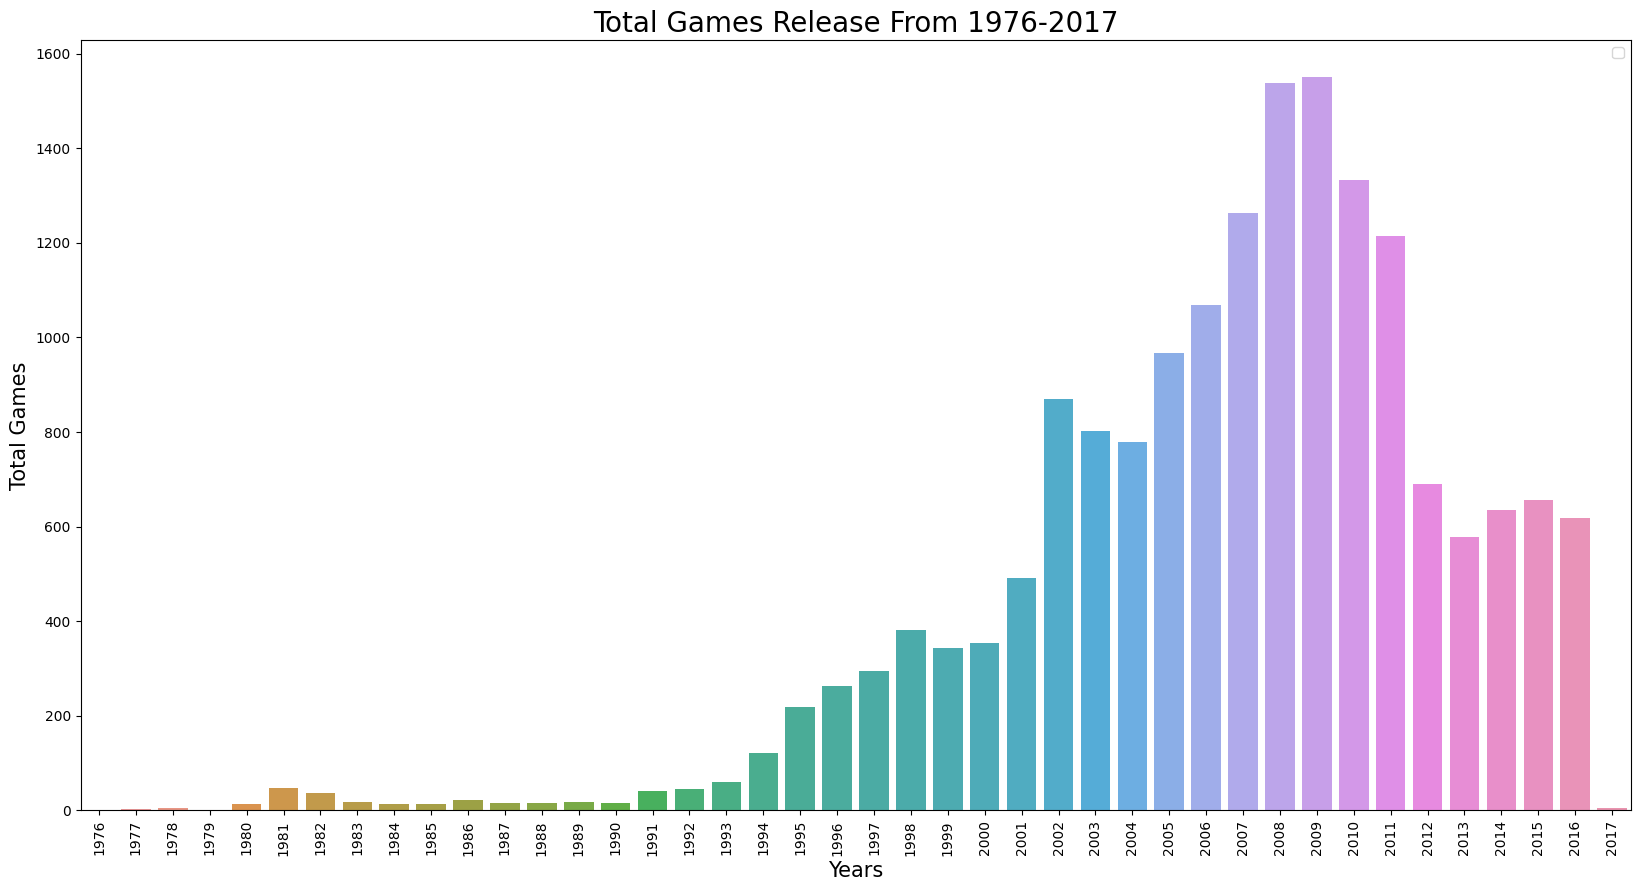

In [112]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Year_of_Release', y='Name', data=game_release)
sns.color_palette("flare", as_cmap=True)
plt.title('Total Games Release From 1976-2017',size=20)
plt.xlabel('Years',size=15)
plt.ylabel('Total Games',size=15)
plt.legend()
plt.xticks(rotation=90)

## Game vs Sales

In [113]:
dfgs = dfg.copy()
game_global = dfgs.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending=False)
game_global.head(10)

Name
Wii Sports                        82.54
Grand Theft Auto V                57.75
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.57
Wii Sports Resort                 32.78
Pokemon Red/Pokemon Blue          31.37
Call of Duty: Black Ops           30.89
Call of Duty: Modern Warfare 3    30.64
New Super Mario Bros.             29.81
Name: Global_Sales, dtype: float64

## Total Revenue per Region

In [114]:
total_sales = dfg[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
total_sales = total_sales.sum().reset_index()
total_sales = total_sales.rename(columns={"index": "Region", 0: "Sales"})
total_sales

Region    Sales
0     NA_Sales  4432.97
1     EU_Sales  2450.90
2     JP_Sales  1306.54
3  Other_Sales   799.54

In [115]:
fig = px.pie(total_sales, values='Sales', names='Region')
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

## Total Global Sales by Publisher

In [116]:
sale_pbl = dfg[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
sale_pbl

Publisher  Global_Sales
0                                 Nintendo       1803.00
1                          Electronic Arts       1132.43
2                               Activision        739.98
3              Sony Computer Entertainment        614.25
4                                  Ubisoft        477.30
5                     Take-Two Interactive        408.69
6                                      THQ        345.51
7             Konami Digital Entertainment        286.01
8                                     Sega        272.19
9                       Namco Bandai Games        258.84
10                  Microsoft Game Studios        252.11
11                                  Capcom        200.92
12                                   Atari        157.67
13  Warner Bros. Interactive Entertainment        155.04
14                             Square Enix        151.93
15              Disney Interactive Studios        118.08
16                       Eidos Interactive         98.72
17                      Bethesda Softworks         87.93
18                               LucasArts         85.90
19                            Midway Games         71.54

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'Bethesda Softworks'),
  Text(18, 0, 'LucasArts'),
  Text(19, 0, 'Midway Games')])

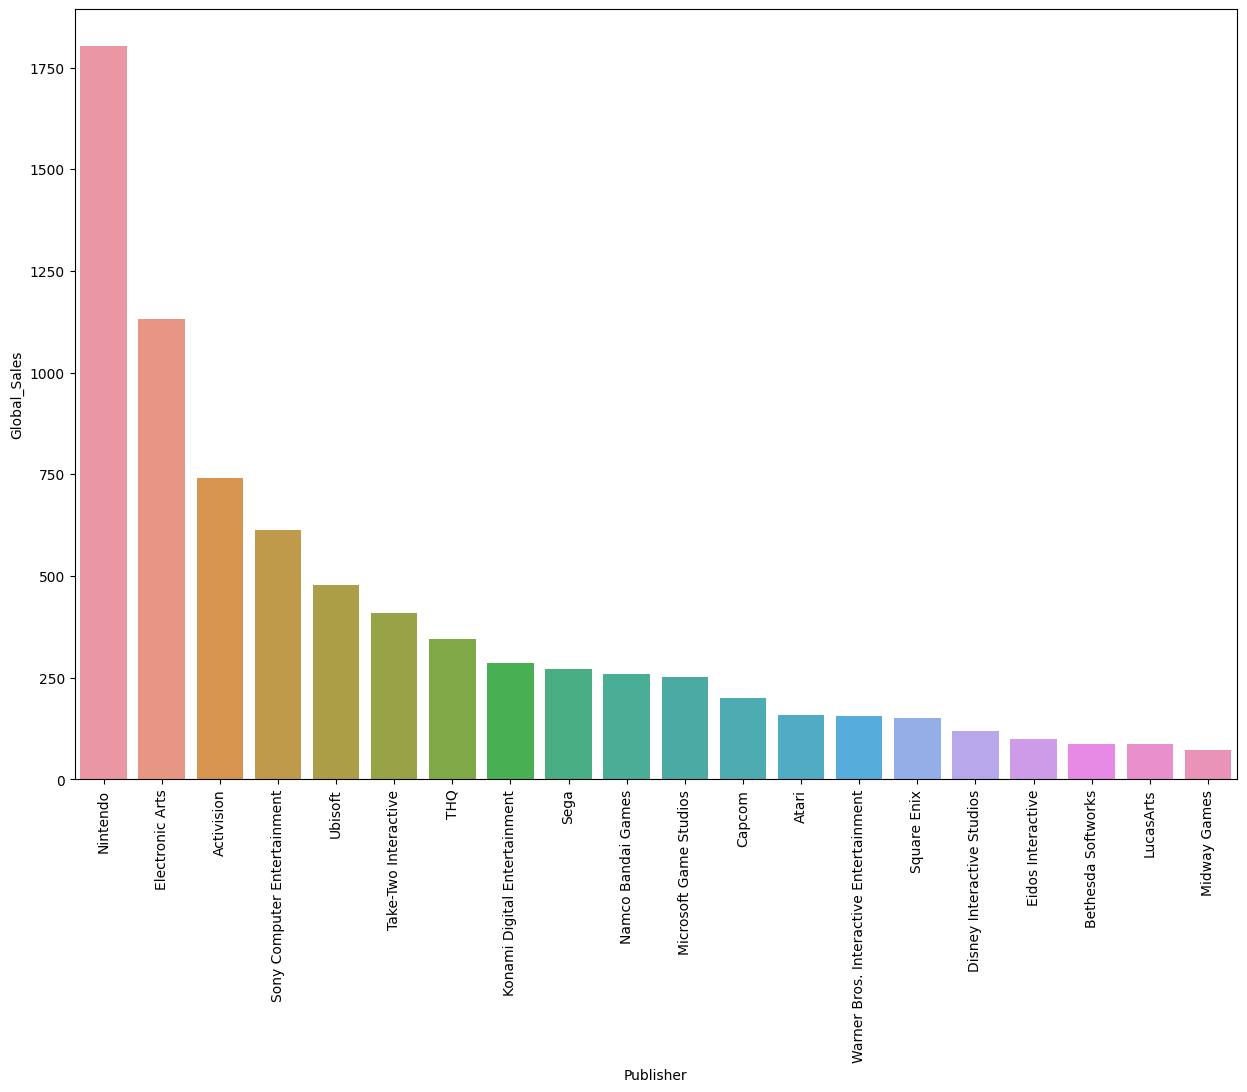

In [117]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

## Platform VS Sales

In [118]:
#Total platform vs global sales
dfps = dfg.copy()
platform_global = dfps.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False)
platform_global.head(10)

Platform
PS2     1256.09
X360     975.49
PS3      943.29
Wii      910.18
DS       808.88
PS       730.71
PS4      340.79
GBA      318.72
PSP      295.71
3DS      270.94
Name: Global_Sales, dtype: float64

In [119]:
#Visualization Platform VS global Sales

px.bar(platform_global,text_auto=True)

In [120]:
# Compare all sales
# Create ariable for grouping by platform by sales
sum1 = dfps.groupby('Platform')['NA_Sales'].sum()
sum2 = dfps.groupby('Platform')['EU_Sales'].sum()
sum3 = dfps.groupby('Platform')['JP_Sales'].sum()
sum4 = dfps.groupby('Platform')['Other_Sales'].sum()

In [121]:
#Convert variable to dataframe
df_sum1 = pd.DataFrame(sum1, columns=['NA_Sales'])
df_sum2 = pd.DataFrame(sum2, columns=['EU_Sales'])
df_sum3 = pd.DataFrame(sum3, columns=['JP_Sales'])
df_sum4 = pd.DataFrame(sum4, columns=['Other_Sales'])

In [122]:
#Join the table on dataframe by outerjoin
df_sum_12 = df_sum1.merge(df_sum2, how='outer', left_on =['Platform'], right_on = ['Platform'])
df_sum_123 = df_sum_12.merge(df_sum3, how='outer', left_on =['Platform'], right_on = ['Platform'])
df_sum_1234 = df_sum_123.merge(df_sum4, how='outer', left_on =['Platform'], right_on = ['Platform'])
df_sum_1234.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Platform                                           
2600         90.60      5.47      0.00         0.91
3DO           0.00      0.00      0.10         0.00
3DS          87.55     65.89    103.29        14.10
DC            5.43      1.69      8.56         0.27
DS          383.24    189.31    176.17        59.36

In [123]:
#Create the visualization
fig = px.bar(df_sum_1234, y=df_sum_1234.columns[0:],title='Platform VS Sales',width=1500) 
fig.show()

## Genre VS Sales

In [124]:
#Total Genre vs Global Sales
dfgs = dfg.copy()
genre_global = dfps.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)
genre_global

Genre
Action          1761.97
Sports          1341.00
Shooter         1067.30
Role-Playing     949.31
Platform         831.74
Misc             808.80
Racing           731.67
Fighting         449.17
Simulation       392.84
Puzzle           243.76
Adventure        241.55
Strategy         175.72
Name: Global_Sales, dtype: float64

In [125]:
# Visualization
px.bar(genre_global,text_auto=True)

In [126]:
# Compare all sales
# Create ariable for grouping by Genre by sales
sumg1 = dfps.groupby('Genre')['NA_Sales'].sum()
sumg2 = dfps.groupby('Genre')['EU_Sales'].sum()
sumg3 = dfps.groupby('Genre')['JP_Sales'].sum()
sumg4 = dfps.groupby('Genre')['Other_Sales'].sum()

In [127]:
#Convert variable to dataframe
df_sumg1 = pd.DataFrame(sumg1, columns=['NA_Sales'])
df_sumg2 = pd.DataFrame(sumg2, columns=['EU_Sales'])
df_sumg3 = pd.DataFrame(sumg3, columns=['JP_Sales'])
df_sumg4 = pd.DataFrame(sumg4, columns=['Other_Sales'])

In [128]:
#Join the table on dataframe by outerjoin
df_sumg_12 = df_sumg1.merge(df_sumg2, how='outer', left_on =['Genre'], right_on = ['Genre'])
df_sumg_123 = df_sumg_12.merge(df_sumg3, how='outer', left_on =['Genre'], right_on = ['Genre'])
df_sumg_1234 = df_sumg_123.merge(df_sumg4, how='outer', left_on =['Genre'], right_on = ['Genre'])
df_sumg_1234.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                               
Action       885.32    525.31    163.65       186.56
Adventure    106.25     64.43     53.90        16.76
Fighting     224.13    100.74     87.88        36.51
Misc         409.81    214.64    108.68        74.91
Platform     446.84    201.87    131.37        51.38

In [129]:
#Create the visualization
fig = px.bar(df_sumg_1234, y=df_sum_1234.columns[0:],title='Genre VS Sales',width=1500) 
fig.show()

## Global Sales vs Year

In [130]:
dfgsy = dfg.copy()
sales_year = dfgsy.groupby(['Year_of_Release'])['Global_Sales'].sum().sort_values(ascending=False)
sales_year

Year_of_Release
2008    688.37
2009    662.73
2007    612.90
2010    600.62
2006    525.69
2011    520.48
2005    464.44
2004    422.08
2002    406.01
2003    367.94
2013    365.34
2012    358.08
2014    338.38
2001    335.49
2015    278.27
1998    257.96
1999    252.47
1997    202.24
2000    202.00
1996    199.15
2016    175.93
1995     88.11
1994     79.18
1992     76.39
1989     73.45
1985     53.94
1984     50.36
1990     49.39
1988     47.22
1993     45.98
1986     37.07
1981     35.77
1991     32.23
1982     29.33
1987     21.74
1983     17.06
1980     14.94
1978      3.27
1977      1.98
1976      0.44
1979      0.31
2017      0.10
Name: Global_Sales, dtype: float64

In [131]:
# Visualization
px.bar(sales_year,text_auto='.2s')

## Global Sales vs Genre vs Name vs Year

In [132]:
dfgg = dfg.copy()
dfgg.sort_values('Global_Sales', ascending=False)

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue        G             1996  Role-Playing   
...                              ...      ...              ...           ...   
16588              Poker for Dummies       PC             2008          Misc   
16587          Petz: Hamsterz Life 2      GBA             2007          Misc   
16586      San-X: Chara Sagashi Land       DS             2007        Action   
16585         Heart no Kuni no Alice      PSP             2009     Adventure   
17415  Brian Lara 2007 Pressure Play      PSP             2007        Sports   

             Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0             Nintendo     41.36     28.96      3.77         8.45   
1             Nintendo     29.08      3.58      6.81         0.77   
2             Nintendo     15.68     12.80      3.79         3.29   
3             Nintendo     15.61     10.95      3.28         2.95   
4             Nintendo     11.27      8.89     10.22         1.00   
...                ...       ...       ...       ...          ...   
16588  Electronic Arts      0.00      0.01      0.00         0.00   
16587          Ubisoft      0.01      0.00      0.00         0.00   
16586              MTO      0.00      0.00      0.01         0.00   
16585        Prototype      0.00      0.00      0.01         0.00   
17415      Codemasters      0.00      0.00      0.00         0.00   

       Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count Rating  
0             82.54          76.0          51.0         8.0       324.0      E  
1             40.24           NaN           NaN         NaN         NaN    NaN  
2             35.57          82.0          73.0         8.3       712.0      E  
3             32.78          80.0          73.0         8.0       193.0      E  
4             31.37           NaN           NaN         NaN         NaN    NaN  
...             ...           ...           ...         ...         ...    ...  
16588          0.01           NaN           NaN         NaN         NaN      T  
16587          0.01           NaN           NaN         NaN         NaN    NaN  
16586          0.01           NaN           NaN         NaN         NaN    NaN  
16585          0.01           NaN           NaN         NaN         NaN    NaN  
17415          0.01           NaN           NaN         NaN         NaN    NaN  

[17416 rows x 15 columns]

In [133]:
fig = px.scatter(dfgg, x='Year_of_Release', y='Global_Sales', color='Genre',
                 size='Global_Sales', hover_data=['Name'],
                 title="Year Global Video Game Sales by Genre",
                 labels={'x':'Years', 'y':'Global Sales In Millions'}
                )

fig.show()

## Global Sales vs Platform vs Genre vs year

In [134]:
dfgs = dfg.copy()

In [279]:
fig = px.scatter(dfgs, x='Year_of_Release', y='Global_Sales', color='Genre',
                 size='Global_Sales', hover_data=['Name'],
                 title="Global Sales of Video Games",
                 )
fig.show()

In [140]:
# fig = px.bar(dfgs, x='Year_of_Release', y='Global_Sales', color='Genre',
#                  hover_data=['Platform'],
#                  title="Global Sales of Video Games",colors=max
#                  )
# fig.show()

In [141]:
fig = px.scatter(dfgs, x='Platform', y='Global_Sales', color='Genre',
                 size='Global_Sales', hover_data=['Publisher'],
                 title="Global Sales of Video Games",
                 )
fig.show()

## Top Selling Per Global

In [142]:
df_tsg = dfg.copy()

In [143]:
top_sales = df_tsg.sort_values(by=['Global_Sales'], ascending=False).head(10)
fig = px.sunburst(top_sales, path=['Genre', 'Platform', 'Publisher'],values='Global_Sales', title= 'Top Selling by Global Sales')
fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=30, l=2, r=2, b=5)
    )

fig.show()

## Year vs Genre

In [144]:
dfgy = dfg.copy()
dfgy.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

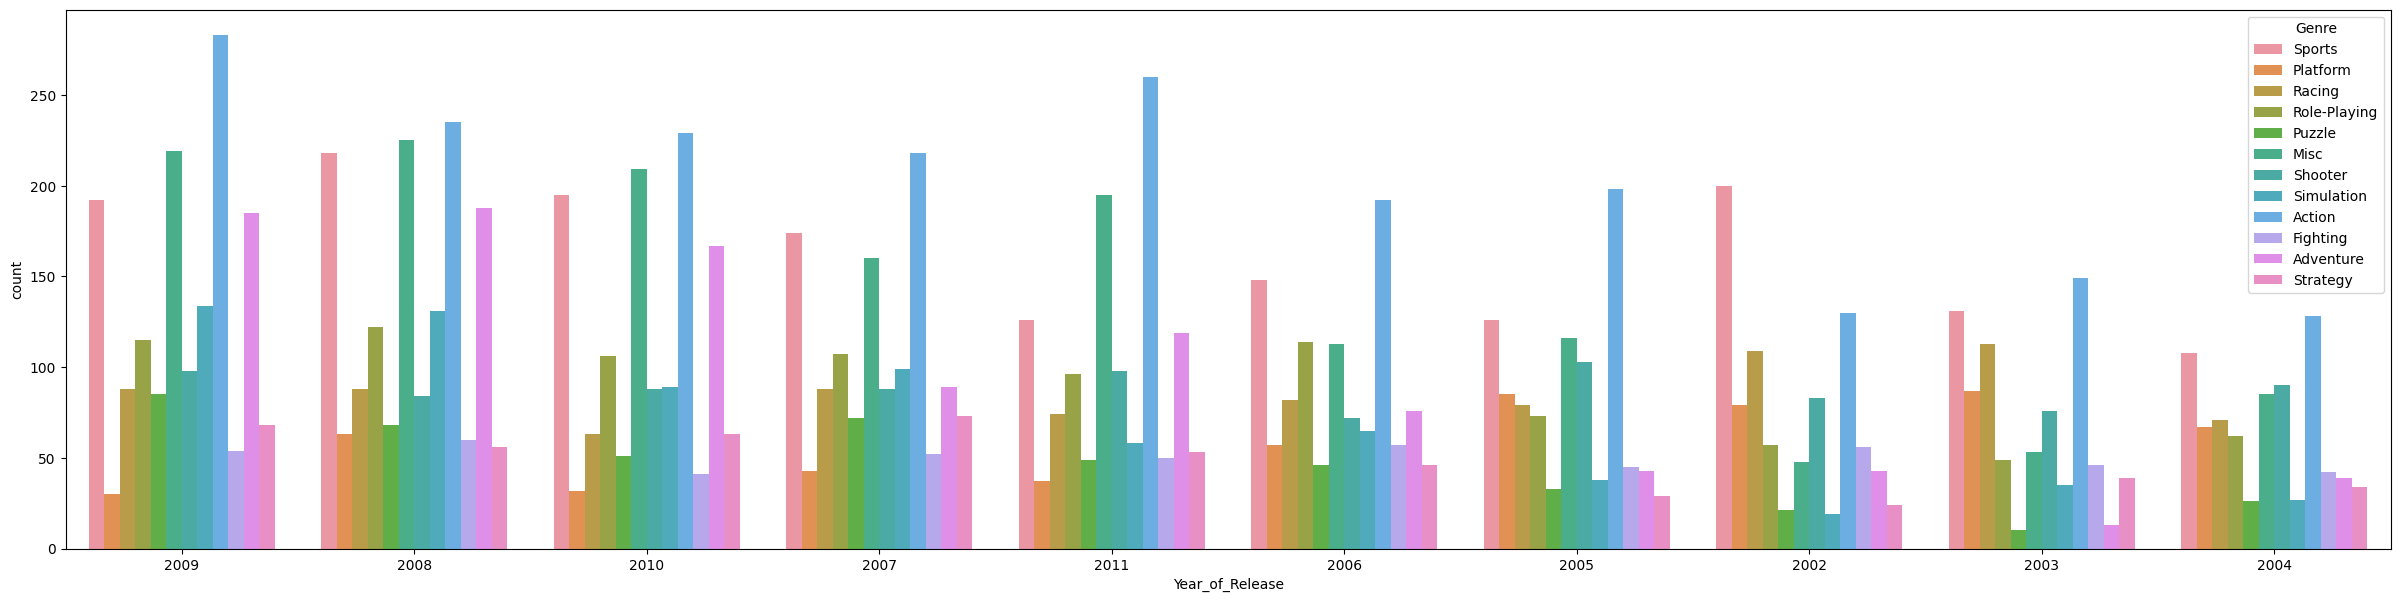

In [145]:
plt.figure(figsize=(30,7))
sns.countplot(data=dfgy,x='Year_of_Release',hue='Genre',order=dfgy.Year_of_Release.value_counts().head(10).index);

## Breakdown of Name

In [146]:
dfbn = dfg.copy()
dfbn['Name'].head()

0                  Wii Sports
1           Super Mario Bros.
2              Mario Kart Wii
3           Wii Sports Resort
4    Pokemon Red/Pokemon Blue
Name: Name, dtype: object

In [147]:
# split all name by " "
df_tags = pd.DataFrame()
df_tags = dfbn['Name'].str.split(' ', expand=True)
df_tags.dropna(axis=1, how='all', inplace=True)
df_tags.head()

0            1       2     3     4     5     6     7     8     9   \
0      Wii       Sports    None  None  None  None  None  None  None  None   
1    Super        Mario   Bros.  None  None  None  None  None  None  None   
2    Mario         Kart     Wii  None  None  None  None  None  None  None   
3      Wii       Sports  Resort  None  None  None  None  None  None  None   
4  Pokemon  Red/Pokemon    Blue  None  None  None  None  None  None  None   

   ...    13    14    15    16    17    18    19    20    21    22  
0  ...  None  None  None  None  None  None  None  None  None  None  
1  ...  None  None  None  None  None  None  None  None  None  None  
2  ...  None  None  None  None  None  None  None  None  None  None  
3  ...  None  None  None  None  None  None  None  None  None  None  
4  ...  None  None  None  None  None  None  None  None  None  None  

[5 rows x 23 columns]

In [148]:
# stacked semua rows jadi satu column untuk melihat name apa yang paling banyak
df_stacked = df_tags.stack().reset_index().dropna()
df_stacked[0] = df_stacked[0].str.upper()
df_stacked[0] = df_stacked[0].str.replace('"', '')
top20_tag = df_stacked[0].value_counts()

In [149]:
df_stacked.rename({0: 'tag'}, axis=1, inplace=True)

In [150]:
df_top20_tag = pd.DataFrame({'tag':top20_tag.index, 'count':top20_tag.values})
df_top20_tag

tag  count
0            THE   2843
1             OF   1785
2              2    884
3             NO    830
4              3    407
...          ...    ...
11350       DANA      1
11351  LACRIMOSA      1
11352       GT64      1
11353      AIDYN      1
11354      MIRO!      1

[11355 rows x 2 columns]

## User vs Critic Score

In [151]:
dfuc = dfg.copy()

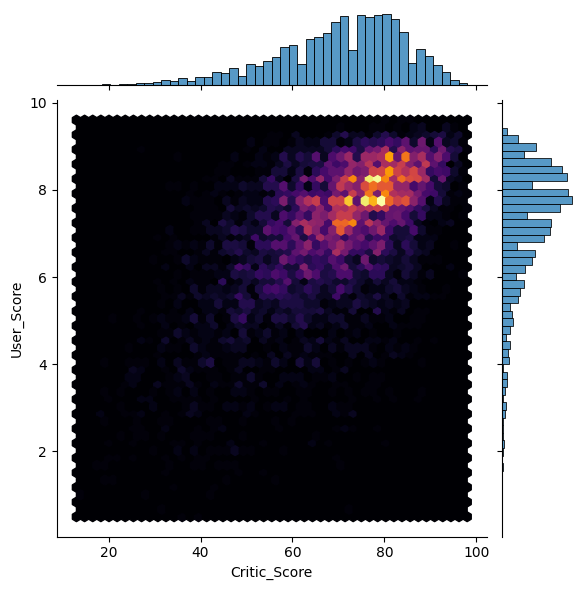

In [152]:
sns.jointplot(data=dfuc, x='Critic_Score',y='User_Score',
              kind='hex', cmap= 'inferno')

## Total Rating

In [153]:
dftr = dfg.copy()

In [154]:
top10_rating = pd.DataFrame(collections.Counter(dftr['Rating'].tolist()).most_common(10),columns=['Rating','Frequency'])
top10_rating

Rating  Frequency
0    NaN       7164
1      E       4120
2      T       3045
3      M       1599
4   E10+       1473
5     EC          8
6    K-A          3
7     RP          3
8     AO          1

In [155]:
px.bar(top10_rating,x='Rating',y='Frequency',text_auto=True)

# EDA per Region

## Best Game Sales per Region

In [156]:
dfbs = dfg.copy()

In [157]:
col = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
title = ['North America','Europe', 'Japan', 'Other Region']


for i,c in enumerate(col):
    sale_df = dfbs.groupby('Name').sum().sort_values(c,ascending=False).head(10).reset_index()[['Name',c]]
    fig = px.bar(sale_df,x='Name',y=c,title='The 10 best selling games in {}'.format(title[i]),
                labels={'Name':'Game',c:title[i]+' Sales'})
    fig.show()

## Best Platform per Region

In [158]:
dfbp = dfg.copy()

In [159]:
col = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
title = ['North America','Europe', 'Japan', 'Other Region']


for i,c in enumerate(col):
    sale_df = dfbp.groupby('Platform').sum().sort_values(c,ascending=False).head(10).reset_index()[['Platform',c]]
    fig = px.bar(sale_df,x='Platform',y=c,title='The 10 best selling platform in {}'.format(title[i]),
                labels={'Platform':'Game',c:title[i]+' Sales'})
    fig.show()

## Best Genre per Region

In [160]:
dfbg = dfg.copy()

In [161]:
col = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
title = ['North America','Europe', 'Japan', 'Other Region']


for i,c in enumerate(col):
    sale_df = dfbg.groupby('Genre').sum().sort_values(c,ascending=False).head(10).reset_index()[['Genre',c]]
    fig = px.bar(sale_df,x='Genre',y=c,title='The 10 best selling Genre in {}'.format(title[i]),
                labels={'Genre':'Game',c:title[i]+' Sales'})
    fig.show()

In [162]:
sale_genre = dfbg.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index()
sale_genre

<ipython-input-162-e2cea2128f71>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0         Action    885.32    525.31    163.65       186.56
1      Adventure    106.25     64.43     53.90        16.76
2       Fighting    224.13    100.74     87.88        36.51
3           Misc    409.81    214.64    108.68        74.91
4       Platform    446.84    201.87    131.37        51.38
5         Puzzle    123.14     50.22     57.39        12.40
6         Racing    360.51    237.60     56.84        76.38
7   Role-Playing    336.74    193.51    358.02        61.11
8        Shooter    600.01    321.82     39.02       106.03
9     Simulation    182.69    114.94     64.12        30.86
10        Sports    688.60    380.16    135.80       135.70
11      Strategy     68.93     45.66     49.87        10.94

In [163]:
sale_gen1 = pd.melt(sale_genre,id_vars=['Genre'],value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],var_name='Sales_area',value_name='Sales')
sale_gen1

Genre   Sales_area   Sales
0         Action     NA_Sales  885.32
1      Adventure     NA_Sales  106.25
2       Fighting     NA_Sales  224.13
3           Misc     NA_Sales  409.81
4       Platform     NA_Sales  446.84
5         Puzzle     NA_Sales  123.14
6         Racing     NA_Sales  360.51
7   Role-Playing     NA_Sales  336.74
8        Shooter     NA_Sales  600.01
9     Simulation     NA_Sales  182.69
10        Sports     NA_Sales  688.60
11      Strategy     NA_Sales   68.93
12        Action     EU_Sales  525.31
13     Adventure     EU_Sales   64.43
14      Fighting     EU_Sales  100.74
15          Misc     EU_Sales  214.64
16      Platform     EU_Sales  201.87
17        Puzzle     EU_Sales   50.22
18        Racing     EU_Sales  237.60
19  Role-Playing     EU_Sales  193.51
20       Shooter     EU_Sales  321.82
21    Simulation     EU_Sales  114.94
22        Sports     EU_Sales  380.16
23      Strategy     EU_Sales   45.66
24        Action     JP_Sales  163.65
25     Adventure     JP_Sales   53.90
26      Fighting     JP_Sales   87.88
27          Misc     JP_Sales  108.68
28      Platform     JP_Sales  131.37
29        Puzzle     JP_Sales   57.39
30        Racing     JP_Sales   56.84
31  Role-Playing     JP_Sales  358.02
32       Shooter     JP_Sales   39.02
33    Simulation     JP_Sales   64.12
34        Sports     JP_Sales  135.80
35      Strategy     JP_Sales   49.87
36        Action  Other_Sales  186.56
37     Adventure  Other_Sales   16.76
38      Fighting  Other_Sales   36.51
39          Misc  Other_Sales   74.91
40      Platform  Other_Sales   51.38
41        Puzzle  Other_Sales   12.40
42        Racing  Other_Sales   76.38
43  Role-Playing  Other_Sales   61.11
44       Shooter  Other_Sales  106.03
45    Simulation  Other_Sales   30.86
46        Sports  Other_Sales  135.70
47      Strategy  Other_Sales   10.94

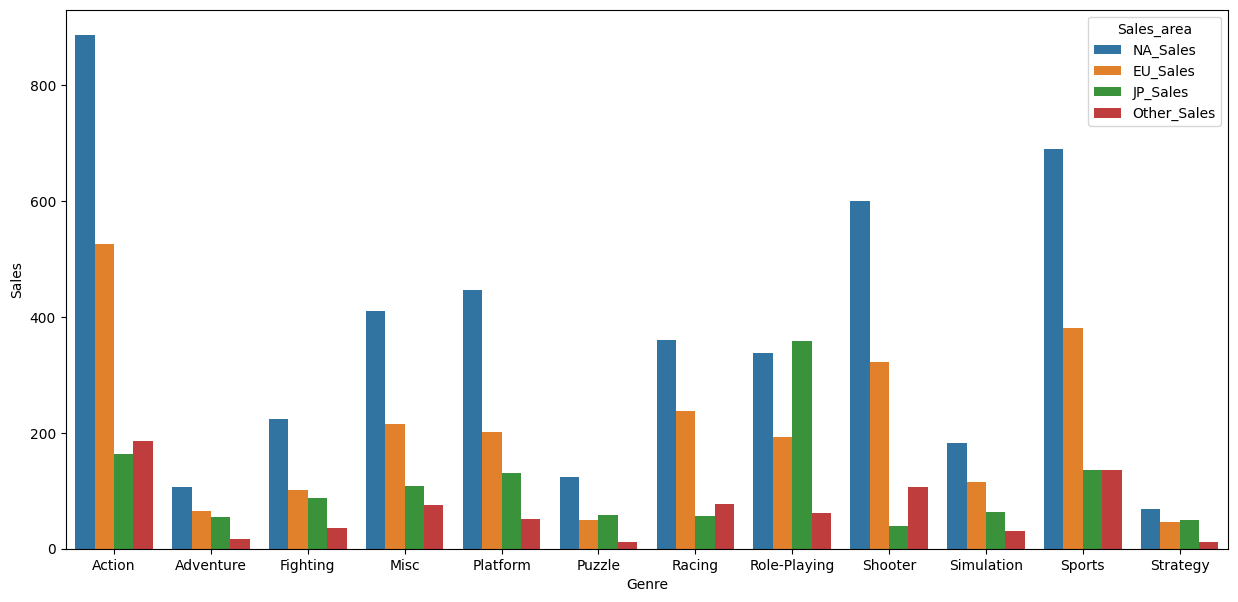

In [164]:
plt.figure(figsize=(15,7))
sns.barplot(data=sale_gen1,x='Genre',y='Sales',hue='Sales_area');

## Best Publisher per Region

In [165]:
dfbp = dfg.copy()

In [166]:
col = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
title = ['North America','Europe', 'Japan', 'Other Region']


for i,c in enumerate(col):
    sale_df = dfbp.groupby('Publisher').sum().sort_values(c,ascending=False).head(10).reset_index()[['Publisher',c]]
    fig = px.bar(sale_df,x='Publisher',y=c,title='The 10 best selling Genre in {}'.format(title[i]),
                labels={'Publisher':'Game',c:title[i]+' Sales'})
    fig.show()

## Sales Analysis per Region

In [167]:
dfsa = dfg.copy()

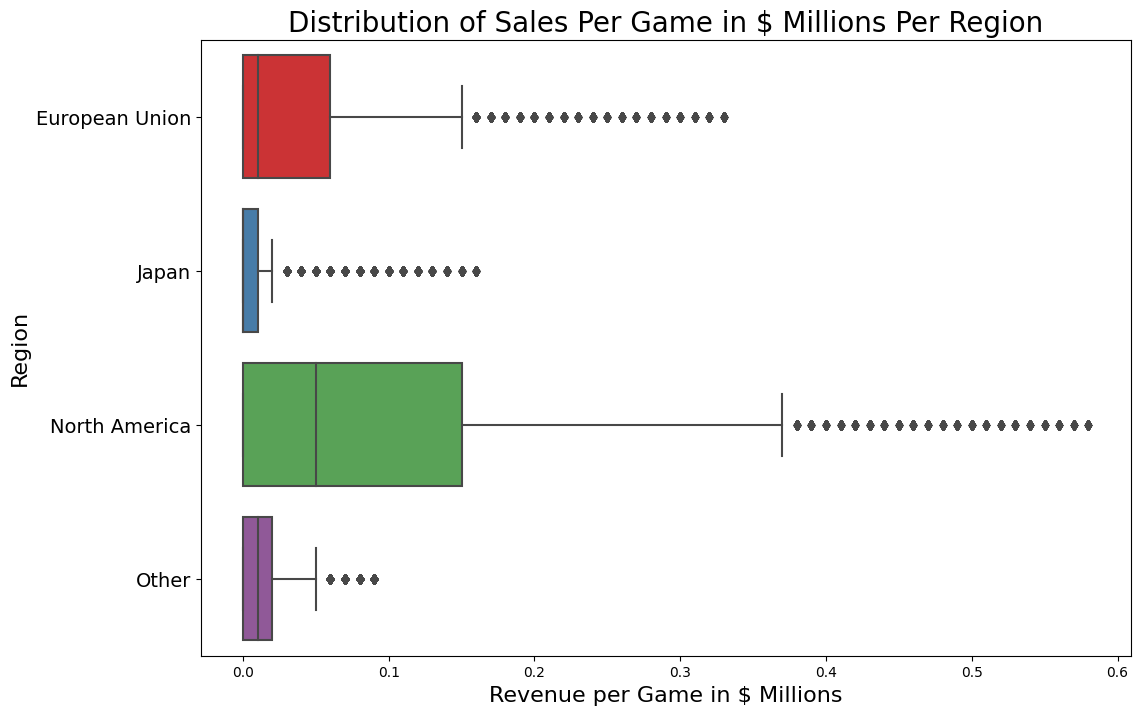

In [168]:
data = dfsa
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']]).T
regions = ['European Union', 'Japan', 'North America', 'Other']
q = data.quantile(0.90)
data = data[data < q]
plt.figure(figsize=(12,8))

colors = sns.color_palette("Set1", len(data))
ax = sns.boxplot(data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue per Game in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Distribution of Sales Per Game in $ Millions Per Region', fontsize=20)
ax.set_yticklabels(labels=regions, fontsize=14)
plt.show()

## Top Selling per Region

In [169]:
dfts = dfg.copy()

In [170]:
top_sales = dfts.sort_values(by=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], ascending=False).head(10)

# ['NA_Sales', '', '', '']
dicts_name = {
    'NA_Sales' : "North America Sales ( In Millions)",
    'EU_Sales' : "Europe Sales ( In Millions)",
    'JP_Sales' : "Japan Sales ( In Millions)",
    'Other_Sales' : "Other Sales ( In Millions)",
}

for (key, title) in dicts_name.items():
    
    fig = px.sunburst(top_sales, path=['Genre', 'Publisher', 'Platform'], values=key, title= 'Top Selling by '+ title)
    
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=30, l=2, r=2, b=5)
    )

    fig.show()

## Total Rating per Region

In [171]:
dftr = dfg.copy()
dftr.head(2)

Name Platform  Year_of_Release     Genre Publisher  NA_Sales  \
0         Wii Sports      Wii             2006    Sports  Nintendo     41.36   
1  Super Mario Bros.      NES             1985  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0     28.96      3.77         8.45         82.54          76.0          51.0   
1      3.58      6.81         0.77         40.24           NaN           NaN   

   User_Score  User_Count Rating  
0         8.0       324.0      E  
1         NaN         NaN    NaN

In [172]:
col = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
title = ['North America','Europe', 'Japan', 'Other Region']


for i,c in enumerate(col):
    sale_df = dftr.groupby('Rating').sum().sort_values(c,ascending=False).head(10).reset_index()[['Rating',c]]
    fig = px.bar(sale_df,x='Rating',y=c,title='The 10 best rating in {}'.format(title[i]),
                labels={'Rating':'Game',c:title[i]+' Sales'})
    fig.show()

# EDA per TOP 3

In [173]:
dftop = dfg.copy()
dftop.head(2)

Name Platform  Year_of_Release     Genre Publisher  NA_Sales  \
0         Wii Sports      Wii             2006    Sports  Nintendo     41.36   
1  Super Mario Bros.      NES             1985  Platform  Nintendo     29.08   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  \
0     28.96      3.77         8.45         82.54          76.0          51.0   
1      3.58      6.81         0.77         40.24           NaN           NaN   

   User_Score  User_Count Rating  
0         8.0       324.0      E  
1         NaN         NaN    NaN

## Genre vs Frequency Global

In [174]:
dfgf = dftop.copy()

### Action

In [175]:
df_gfa = dfgf.copy()

In [176]:
top3_Genre = pd.DataFrame(collections.Counter(df_gfa['Genre'].tolist()).most_common(5),columns=['Genre','Frequency'])
top3_Genre

Genre  Frequency
0        Action       3503
1        Sports       2408
2          Misc       1813
3  Role-Playing       1545
4     Adventure       1478

In [177]:
gen_act = df_gfa[df_gfa['Genre'] == 'Action']
gen_act2 = pd.DataFrame(collections.Counter(gen_act['Platform'].tolist()).most_common(5),columns=['Platform','Frequency'])
gen_act2

Platform  Frequency
0      PS3        391
1      PS2        351
2       DS        350
3     X360        328
4      Wii        240

In [178]:
# fig = px.pie(gen_act2, values='Frequency', names='Platform')
# fig.update_traces(textposition='inside', textinfo='percent+label+value')
# fig.show()

In [179]:
top3_pub = df_gfa[df_gfa['Genre'] == 'Action']
top3_pub2 = pd.DataFrame(collections.Counter(top3_pub['Publisher'].tolist()).most_common(10),columns=['Publisher','Frequency'])
top3_pub2

Publisher  Frequency
0                              Activision        317
1                      Namco Bandai Games        265
2                                 Ubisoft        204
3                                     THQ        196
4                         Electronic Arts        186
5  Warner Bros. Interactive Entertainment        172
6                                  Capcom        161
7            Konami Digital Entertainment        155
8                              Tecmo Koei        146
9                                    Sega        104

In [180]:
top3_games = df_gfa[df_gfa['Genre'] == 'Action']
top3_games2 = pd.DataFrame(collections.Counter(top3_games['Name'].tolist()).most_common(5),columns=['Name','Frequency'])
top3_games2

Name  Frequency
0                 LEGO Marvel Super Heroes          9
1                              Ratatouille          9
2                           FIFA Soccer 13          8
3  LEGO Star Wars II: The Original Trilogy          8
4           LEGO Batman 2: DC Super Heroes          8

In [181]:
# split all name by " "
df_sia = pd.DataFrame()
df_sia = gen_act['Name'].str.split(' ', expand=True)
df_sia.dropna(axis=1, how='all', inplace=True)
df_sia.head(2)

0      1      2    3        4     5     6     7     8     9     10  \
16  Grand  Theft   Auto    V     None  None  None  None  None  None  None   
17  Grand  Theft  Auto:  San  Andreas  None  None  None  None  None  None   

      11    12    13    14    15    16    17    18    19  
16  None  None  None  None  None  None  None  None  None  
17  None  None  None  None  None  None  None  None  None

In [182]:
# stacked semua rows jadi satu column untuk melihat name apa yang paling banyak
df_ssa = df_sia.stack().reset_index().dropna()
df_ssa[0] = df_ssa[0].str.upper()
df_ssa[0] = df_ssa[0].str.replace('"', '')
top_tag = df_ssa[0].value_counts()
top_tag.head(10)

THE         1005
OF           540
2            171
LEGO         146
NO           129
AND          119
WARRIORS     106
GAME         105
STAR          82
2:            73
Name: 0, dtype: int64

### Sport

In [183]:
df_gfs = dfgf.copy()

In [184]:
gen_spo = df_gfs[df_gfs['Genre'] == 'Sports']
gen_spo2 = pd.DataFrame(collections.Counter(gen_spo['Platform'].tolist()).most_common(5),columns=['Platform','Frequency'])
gen_spo2

Platform  Frequency
0      PS2        403
1      Wii        267
2     X360        226
3       PS        223
4      PS3        216

In [185]:
# fig = px.pie(gen_spo2, values='Frequency', names='Platform')
# fig.update_traces(textposition='inside', textinfo='percent+label+value')
# fig.show()

In [186]:
top5_pub = df_gfs[df_gfs['Genre'] == 'Sports']
top5_pub2 = pd.DataFrame(collections.Counter(top5_pub['Publisher'].tolist()).most_common(10),columns=['Publisher','Frequency'])
top5_pub2

Publisher  Frequency
0               Electronic Arts        568
1  Konami Digital Entertainment        288
2          Take-Two Interactive        162
3                    Activision        146
4                          Sega        140
5   Sony Computer Entertainment        126
6                       Ubisoft         74
7                  Midway Games         62
8                         Atari         57
9                      Nintendo         56

In [187]:
top5_games = df_gfs[df_gfs['Genre'] == 'Sports']
top5_games2 = pd.DataFrame(collections.Counter(top5_games['Name'].tolist()).most_common(5),columns=['Name','Frequency'])
top5_games2

Name  Frequency
0        FIFA 14          9
1  Madden NFL 07          9
2  Madden NFL 08          9
3        FIFA 15          8
4        FIFA 12          7

### Misc

In [188]:
df_gfm = dfgf.copy()

In [189]:
gen_misc = df_gfm[df_gfm['Genre'] == 'Misc']
gen_misc2 = pd.DataFrame(collections.Counter(gen_misc['Platform'].tolist()).most_common(5),columns=['Platform','Frequency'])
gen_misc2

Platform  Frequency
0       DS        403
1      Wii        290
2      PS2        224
3     X360        128
4      PS3        125

In [190]:
# fig = px.pie(gen_misc2, values='Frequency', names='Platform')
# fig.update_traces(textposition='inside', textinfo='percent+label+value')
# fig.show()

In [191]:
to_pub = df_gfm[df_gfm['Genre'] == 'Misc']
to_pub2 = pd.DataFrame(collections.Counter(to_pub['Publisher'].tolist()).most_common(10),columns=['Publisher','Frequency'])
to_pub2

Publisher  Frequency
0                       Ubisoft        166
1   Sony Computer Entertainment        130
2            Namco Bandai Games        106
3                    Activision        105
4                      Nintendo        103
5  Konami Digital Entertainment         80
6                           THQ         73
7                          Sega         67
8               Electronic Arts         47
9    Disney Interactive Studios         46

In [192]:
to_games = df_gfm[df_gfm['Genre'] == 'Misc']
to_games2 = pd.DataFrame(collections.Counter(top5_games['Name'].tolist()).most_common(5),columns=['Name','Frequency'])
to_games2

Name  Frequency
0        FIFA 14          9
1  Madden NFL 07          9
2  Madden NFL 08          9
3        FIFA 15          8
4        FIFA 12          7

## Genre vs Sales Global

In [193]:
dfggs = dftop.copy()

In [194]:
gen_glob = dfggs.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)
gen_glob

Genre
Action          1761.97
Sports          1341.00
Shooter         1067.30
Role-Playing     949.31
Platform         831.74
Misc             808.80
Racing           731.67
Fighting         449.17
Simulation       392.84
Puzzle           243.76
Adventure        241.55
Strategy         175.72
Name: Global_Sales, dtype: float64

### Action

In [195]:
dfgsa = dfggs.copy()
gen_a1 = dfgsa[dfgsa['Genre'] == 'Action']
gen_a11 = gen_a1.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False)
gen_a11.head(5)

Platform
PS3     302.82
PS2     272.79
X360    240.69
PS      127.05
Wii     114.45
Name: Global_Sales, dtype: float64

In [196]:
sale_1 = dfgsa[dfgsa['Genre'] == 'Action']
sale_1 = sale_1[['Publisher', 'Global_Sales']]
sale_12 = sale_1.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_12 = pd.DataFrame(sale_pbl).reset_index()
sale_12.head(5)

index                    Publisher  Global_Sales
0      0                     Nintendo       1803.00
1      1              Electronic Arts       1132.43
2      2                   Activision        739.98
3      3  Sony Computer Entertainment        614.25
4      4                      Ubisoft        477.30

In [197]:
gm_gl1 = dfgsa[dfgsa['Genre'] == 'Action']
gm_gl2 = gm_gl1.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending=False)
gm_gl2.head(5)

Name
Grand Theft Auto V               57.75
Grand Theft Auto: San Andreas    23.84
Grand Theft Auto IV              22.40
Grand Theft Auto: Vice City      16.19
FIFA Soccer 13                   15.99
Name: Global_Sales, dtype: float64

### Sports

In [198]:
dfgss = dfggs.copy()
gen_a12 = dfgss[dfgss['Genre'] == 'Sports']
gen_a112 = gen_a12.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False)
gen_a112.head(5)

Platform
Wii     288.91
PS2     273.44
X360    139.41
PS3     134.75
PS      120.98
Name: Global_Sales, dtype: float64

In [199]:
sale_12 = dfgss[dfgsa['Genre'] == 'Sports']
sale_12 = sale_12[['Publisher', 'Global_Sales']]
sale_122 = sale_12.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_122 = pd.DataFrame(sale_pbl).reset_index()
sale_122.head(5)

index                    Publisher  Global_Sales
0      0                     Nintendo       1803.00
1      1              Electronic Arts       1132.43
2      2                   Activision        739.98
3      3  Sony Computer Entertainment        614.25
4      4                      Ubisoft        477.30

In [200]:
gm_gl12 = dfgss[dfgss['Genre'] == 'Sports']
gm_gl22 = gm_gl12.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending=False)
gm_gl22.head(5)

Name
Wii Sports           82.54
Wii Sports Resort    32.78
Wii Fit              22.70
Wii Fit Plus         21.79
FIFA 15              17.41
Name: Global_Sales, dtype: float64

### Shooter

In [201]:
dfgsss = dfggs.copy()
gen_a13 = dfgsss[dfgsss['Genre'] == 'Shooter']
gen_a113 = gen_a13.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False)
gen_a113.head(5)

Platform
X360    277.67
PS3     192.77
PS2     108.57
PS4      95.41
XOne     65.77
Name: Global_Sales, dtype: float64

In [202]:
sale_13 = dfgsss[dfgsss['Genre'] == 'Shooter']
sale_13 = sale_13[['Publisher', 'Global_Sales']]
sale_123 = sale_13.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_123 = pd.DataFrame(sale_pbl).reset_index()
sale_123.head(5)

index                    Publisher  Global_Sales
0      0                     Nintendo       1803.00
1      1              Electronic Arts       1132.43
2      2                   Activision        739.98
3      3  Sony Computer Entertainment        614.25
4      4                      Ubisoft        477.30

In [203]:
gm_gl13 = dfgsss[dfgsss['Genre'] == 'Sports']
gm_gl23 = gm_gl13.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending=False)
gm_gl23.head(5)

Name
Wii Sports           82.54
Wii Sports Resort    32.78
Wii Fit              22.70
Wii Fit Plus         21.79
FIFA 15              17.41
Name: Global_Sales, dtype: float64

## Genre vs Frequency Region

In [204]:
dfgfr = dftop.copy()

In [205]:
col2 = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
title = ['North America','Europe', 'Japan', 'Other Region']


for i,c in enumerate(col2):
    gen_df1 = dfgfr.groupby('Genre').count().sort_values(c,ascending=False).head(5).reset_index()[['Genre',c]]
    # 
    print(gen_df1)

          Genre  NA_Sales
0        Action      3503
1        Sports      2408
2          Misc      1813
3  Role-Playing      1545
4     Adventure      1478
          Genre  EU_Sales
0        Action      3503
1        Sports      2408
2          Misc      1813
3  Role-Playing      1545
4     Adventure      1478
          Genre  JP_Sales
0        Action      3503
1        Sports      2408
2          Misc      1813
3  Role-Playing      1545
4     Adventure      1478
          Genre  Other_Sales
0        Action         3503
1        Sports         2408
2          Misc         1813
3  Role-Playing         1545
4     Adventure         1478


In [206]:
col2 = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
title = ['North America','Europe', 'Japan', 'Other Region']
df1234 = dfgfr[dfgfr['Genre'] == 'Misc']

for i,c in enumerate(col2):
    sale_df1 = df1234.groupby('Name').count().sort_values(c,ascending=False).head(5).reset_index()[['Name',c]]
    print(sale_df1)

                              Name  NA_Sales
0                         Monopoly         8
1                  Just Dance 2017         6
2                  Just Dance 2014         6
3  Michael Jackson: The Experience         6
4                  Just Dance 2015         6
                              Name  EU_Sales
0                         Monopoly         8
1                  Just Dance 2017         6
2                  Just Dance 2014         6
3  Michael Jackson: The Experience         6
4                  Just Dance 2015         6
                              Name  JP_Sales
0                         Monopoly         8
1                  Just Dance 2017         6
2                  Just Dance 2014         6
3  Michael Jackson: The Experience         6
4                  Just Dance 2015         6
                              Name  Other_Sales
0                         Monopoly            8
1                  Just Dance 2017            6
2                  Just Dance 2014            

## Genre vs Sales region

In [207]:
dfgfs = dftop.copy()

In [208]:
col = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
title = ['North America','Europe', 'Japan', 'Other Region']


for i,c in enumerate(col):
    sale_df1 = dfgfs.groupby('Genre').sum().sort_values(c,ascending=False).head(5).reset_index()[['Genre',c]]
    print(sale_df1)

      Genre  NA_Sales
0    Action    885.32
1    Sports    688.60
2   Shooter    600.01
3  Platform    446.84
4      Misc    409.81
     Genre  EU_Sales
0   Action    525.31
1   Sports    380.16
2  Shooter    321.82
3   Racing    237.60
4     Misc    214.64
          Genre  JP_Sales
0  Role-Playing    358.02
1        Action    163.65
2        Sports    135.80
3      Platform    131.37
4          Misc    108.68
     Genre  Other_Sales
0   Action       186.56
1   Sports       135.70
2  Shooter       106.03
3   Racing        76.38
4     Misc        74.91


In [209]:
col = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
title = ['North America','Europe', 'Japan', 'Other Region']
df123 = dfgfs[dfgfs['Genre'] == 'Role-Playing']

for i,c in enumerate(col):
    sale_df1 = df123.groupby('Platform').sum().sort_values(c,ascending=False).head(5).reset_index()[['Platform',c]]
    print(sale_df1)

  Platform  NA_Sales
0       DS     46.16
1     X360     44.81
2      PS2     32.85
3      PS3     30.06
4        G     28.71
  Platform  EU_Sales
0       PC     25.95
1        G     21.67
2      PS3     18.51
3      PS2     18.42
4     X360     17.89
  Platform  JP_Sales
0       DS     54.66
1      3DS     43.14
2       PS     40.95
3        G     34.55
4      PS2     34.01
  Platform  Other_Sales
0      PS3         8.52
1      PS2         8.27
2       DS         6.29
3     X360         6.17
4      PS4         4.86


In [210]:
col = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
title = ['North America','Europe', 'Japan', 'Other Region']
df1234 = dfgfs[dfgfs['Genre'] == 'Role-Playing']

for i,c in enumerate(col):
    sale_df1 = df1234.groupby('Publisher').sum().sort_values(c,ascending=False).head(5).reset_index()[['Publisher',c]]
    print(sale_df1)

            Publisher  NA_Sales
0            Nintendo    111.12
1         Square Enix     33.94
2  Bethesda Softworks     28.37
3          Activision     23.71
4     Electronic Arts     17.91
            Publisher  EU_Sales
0            Nintendo     67.30
1  Bethesda Softworks     21.56
2          Activision     18.49
3         Square Enix     16.36
4     Electronic Arts     11.20
            Publisher  JP_Sales
0            Nintendo    105.45
1         Square Enix     43.56
2          SquareSoft     36.45
3    Enix Corporation     31.26
4  Namco Bandai Games     28.49
            Publisher  Other_Sales
0            Nintendo        14.01
1         Square Enix         8.81
2  Bethesda Softworks         7.11
3          Activision         4.39
4  Namco Bandai Games         3.61


In [211]:
col = ['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']
title = ['North America','Europe', 'Japan', 'Other Region']
df12345 = dfgfs[dfgfs['Genre'] == 'Role-Playing']

for i,c in enumerate(col):
    sale_df1 = df12345.groupby('Name').sum().sort_values(c,ascending=False).head(5).reset_index()[['Name',c]]
    print(sale_df1)

                            Name  NA_Sales
0       Pokemon Red/Pokemon Blue     11.27
1    The Elder Scrolls V: Skyrim     10.22
2    Pokemon Gold/Pokemon Silver      9.00
3  Pokemon Diamond/Pokemon Pearl      6.38
4  Pokemon Ruby/Pokemon Sapphire      6.06
                          Name  EU_Sales
0     Pokemon Red/Pokemon Blue      8.89
1  The Elder Scrolls V: Skyrim      8.76
2            World of Warcraft      6.22
3  Pokemon Gold/Pokemon Silver      6.18
4                    Fallout 4      5.51
                                 Name  JP_Sales
0            Pokemon Red/Pokemon Blue     10.22
1         Pokemon Gold/Pokemon Silver      7.20
2       Pokemon Diamond/Pokemon Pearl      6.04
3         Pokemon Black/Pokemon White      5.66
4  Dragon Quest VII: Warriors of Eden      5.40
                            Name  Other_Sales
0    The Elder Scrolls V: Skyrim         2.87
1              Final Fantasy XII         1.74
2                      Fallout 4         1.68
3                 Dragon

# EDA Freq vs sales

## Platform

In [212]:
dfsp = dfg.copy()

In [213]:
top10_plt = pd.DataFrame(collections.Counter(dfsp['Platform'].tolist()).most_common(),columns=['Platform','Frequency'])
top10_plt

Platform  Frequency
0        DS       2251
1       PS2       2206
2       PS3       1362
3       Wii       1359
4       PSP       1304
5      X360       1298
6        PS       1200
7        PC       1128
8       GBA        844
9         X        833
10       GC        563
11      3DS        553
12      PSV        503
13      PS4        424
14      N64        319
15     XOne        264
16     SNES        239
17      SAT        173
18     WiiU        153
19     2600        133
20      NES         98
21        G         98
22       DC         52
23      GEN         27
24       NG         12
25       WS          7
26      SCD          6
27      3DO          3
28     TG16          2
29       GG          1
30     PCFX          1

In [214]:
top10_plt2 = dfsp.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False)
top10_plt2.reset_index()

Platform  Global_Sales
0       PS2       1256.09
1      X360        975.49
2       PS3        943.29
3       Wii        910.18
4        DS        808.88
5        PS        730.71
6       PS4        340.79
7       GBA        318.72
8       PSP        295.71
9       3DS        270.94
10       PC        264.95
11        X        258.35
12        G        255.45
13      NES        251.07
14      N64        218.88
15     SNES        200.05
16       GC        199.43
17     XOne        173.82
18     2600         97.08
19     WiiU         84.93
20      PSV         57.03
21      SAT         33.59
22      GEN         28.36
23       DC         15.97
24      SCD          1.87
25       NG          1.44
26       WS          1.43
27     TG16          0.16
28      3DO          0.10
29       GG          0.04
30     PCFX          0.03

In [215]:
top_all = top10_plt.merge(top10_plt2,how='inner',on='Platform')
top_all = pd.DataFrame(top_all)
top_all.set_index(['Platform'],inplace=True)
top_all.head()

Frequency  Global_Sales
Platform                         
DS             2251        808.88
PS2            2206       1256.09
PS3            1362        943.29
Wii            1359        910.18
PSP            1304        295.71

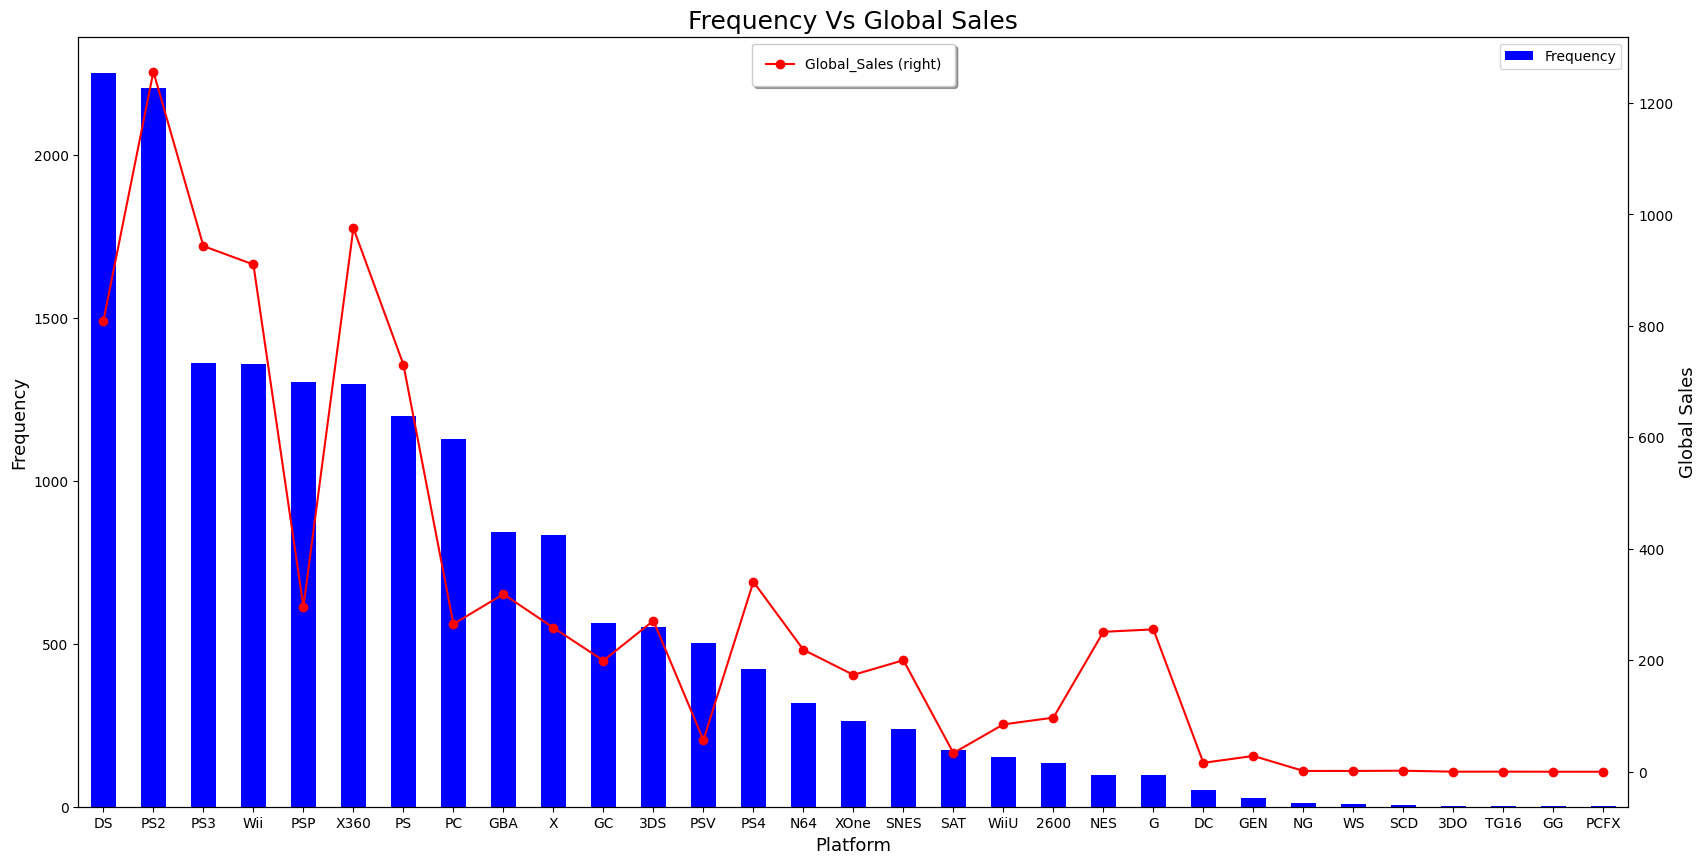

In [216]:
top_all.iloc[:,0:1].plot(kind='bar', stacked=True, figsize=(20,10),color='blue')
plt.xlabel('Platform', size=13)
plt.ylabel('Frequency',size=13)
top_all.iloc[:,1].plot(kind='line', secondary_y=True, use_index=False, linestyle='-', marker='o',color='red')
plt.legend(loc='upper center', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Frequency Vs Global Sales', size=18)
plt.ylabel('Global Sales',size=13)
plt.show()

## Genre

In [217]:
dfsg = dfg.copy()

In [218]:
#top 10 Genre
top_Genre = pd.DataFrame(collections.Counter(dfsg['Genre'].tolist()).most_common(),columns=['Genre','Frequency'])
top_Genre

Genre  Frequency
0         Action       3503
1         Sports       2408
2           Misc       1813
3   Role-Playing       1545
4      Adventure       1478
5        Shooter       1349
6         Racing       1282
7     Simulation        925
8       Platform        900
9       Fighting        864
10      Strategy        734
11        Puzzle        615

In [219]:
gen_global = dfsg.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)
gen_global

Genre
Action          1761.97
Sports          1341.00
Shooter         1067.30
Role-Playing     949.31
Platform         831.74
Misc             808.80
Racing           731.67
Fighting         449.17
Simulation       392.84
Puzzle           243.76
Adventure        241.55
Strategy         175.72
Name: Global_Sales, dtype: float64

In [220]:
top_allgen = top_Genre.merge(gen_global,how='inner',on='Genre')
top_allgen = pd.DataFrame(top_allgen)
top_allgen.set_index(['Genre'],inplace=True)
top_allgen.head()

Frequency  Global_Sales
Genre                                
Action             3503       1761.97
Sports             2408       1341.00
Misc               1813        808.80
Role-Playing       1545        949.31
Adventure          1478        241.55

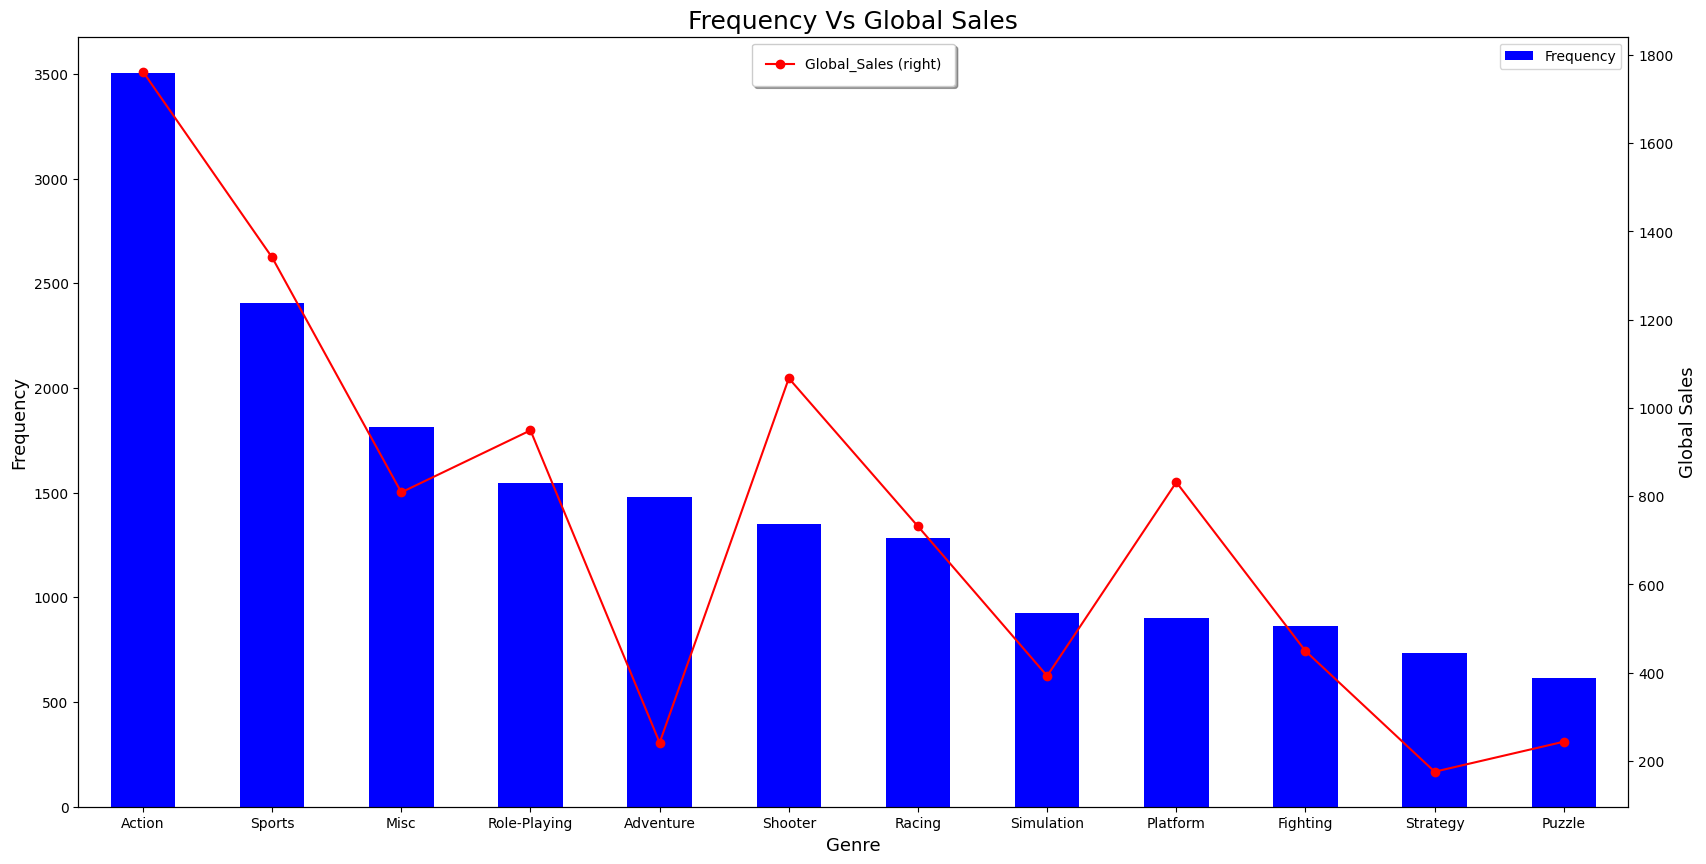

In [221]:
top_allgen.iloc[:,0:1].plot(kind='bar', stacked=True, figsize=(20,10),color='blue',)
plt.xlabel('Genre', size=13)
plt.ylabel('Frequency',size=13)
top_allgen.iloc[:,1].plot(kind='line', secondary_y=True, use_index=False, linestyle='-', marker='o',color='red')
plt.legend(loc='upper center', fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.title('Frequency Vs Global Sales', size=18)
plt.ylabel('Global Sales',size=13)
plt.show()

# Trials and Error

In [222]:
dfte = dfg.copy()
dfte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17416 non-null  int64  
 3   Genre            17416 non-null  object 
 4   Publisher        17416 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 2.0+ MB


In [223]:
dfte['Platform'].unique()

array(['Wii', 'NES', 'G', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'X', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [224]:
dfte['Platform_'] = dfte['Platform']
dfte['Platform_'].replace(['Wii', 'NES', 'G', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'X', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],inplace=True)

In [225]:
dfte['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [226]:
dfte['Genre_'] = dfte['Genre']
dfte['Genre_'].replace(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'],[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)

In [227]:
dfte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17416 non-null  int64  
 3   Genre            17416 non-null  object 
 4   Publisher        17416 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
 15  Platform_        17416 non-null  int64  
 16  Genre_           17416 non-null  int64  
dtypes: float64(9

In [228]:
sns.pairplot(dfte)

Output hidden; open in https://colab.research.google.com to view.

In [229]:
dfte.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii             2006        Sports  Nintendo   
1         Super Mario Bros.      NES             1985      Platform  Nintendo   
2            Mario Kart Wii      Wii             2008        Racing  Nintendo   
3         Wii Sports Resort      Wii             2009        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue        G             1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.54          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.80      3.79         3.29         35.57          82.0   
3     15.61     10.95      3.28         2.95         32.78          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count  User_Score  User_Count Rating  Platform_  Genre_  
0          51.0         8.0       324.0      E          0       0  
1           NaN         NaN         NaN    NaN          1       1  
2          73.0         8.3       712.0      E          0       2  
3          73.0         8.0       193.0      E          0       0  
4           NaN         NaN         NaN    NaN          2       3

## Year of Release vs Platform

In [230]:
dfcl = dfte.copy()

In [231]:
#Import libraries
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs

In [232]:
dfcl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17416 non-null  int64  
 3   Genre            17416 non-null  object 
 4   Publisher        17416 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
 15  Platform_        17416 non-null  int64  
 16  Genre_           17416 non-null  int64  
dtypes: float64(9

In [233]:
dfcl.reset_index()

index                                              Name Platform  \
0          0                                        Wii Sports      Wii   
1          1                                 Super Mario Bros.      NES   
2          2                                    Mario Kart Wii      Wii   
3          3                                 Wii Sports Resort      Wii   
4          4                          Pokemon Red/Pokemon Blue        G   
...      ...                                               ...      ...   
17411  17411  Nancy Drew: The Deadly Secret of Olde World Park       DS   
17412  17412                      Fashion Designer: Style Icon       DS   
17413  17413            Ashita no Joe 2: The Anime Super Remix      PS2   
17414  17414            NadePro!! Kisama no Seiyuu Yatte Miro!      PS2   
17415  17415                     Brian Lara 2007 Pressure Play      PSP   

       Year_of_Release         Genre              Publisher  NA_Sales  \
0                 2006        Sports               Nintendo     41.36   
1                 1985      Platform               Nintendo     29.08   
2                 2008        Racing               Nintendo     15.68   
3                 2009        Sports               Nintendo     15.61   
4                 1996  Role-Playing               Nintendo     11.27   
...                ...           ...                    ...       ...   
17411             2007     Adventure  Majesco Entertainment      0.00   
17412             2007    Simulation              505 Games      0.00   
17413             2002      Fighting                 Capcom      0.00   
17414             2009     Adventure                 GungHo      0.00   
17415             2007        Sports            Codemasters      0.00   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0         28.96      3.77         8.45         82.54          76.0   
1          3.58      6.81         0.77         40.24           NaN   
2         12.80      3.79         3.29         35.57          82.0   
3         10.95      3.28         2.95         32.78          80.0   
4          8.89     10.22         1.00         31.37           NaN   
...         ...       ...          ...           ...           ...   
17411      0.00      0.00         0.00          0.01          64.0   
17412      0.00      0.00         0.00          0.01           NaN   
17413      0.00      0.01         0.00          0.01           NaN   
17414      0.00      0.01         0.00          0.01           NaN   
17415      0.00      0.00         0.00          0.01           NaN   

       Critic_Count  User_Score  User_Count Rating  Platform_  Genre_  
0              51.0         8.0       324.0      E          0       0  
1               NaN         NaN         NaN    NaN          1       1  
2              73.0         8.3       712.0      E          0       2  
3              73.0         8.0       193.0      E          0       0  
4               NaN         NaN         NaN    NaN          2       3  
...             ...         ...         ...    ...        ...     ...  
17411           7.0         NaN         NaN      E          3      10  
17412           NaN         NaN         NaN    NaN          3       7  
17413           NaN         NaN         NaN    NaN          6       9  
17414           NaN         NaN         NaN    NaN          6      10  
17415           NaN         NaN         NaN    NaN         16       0  

[17416 rows x 18 columns]

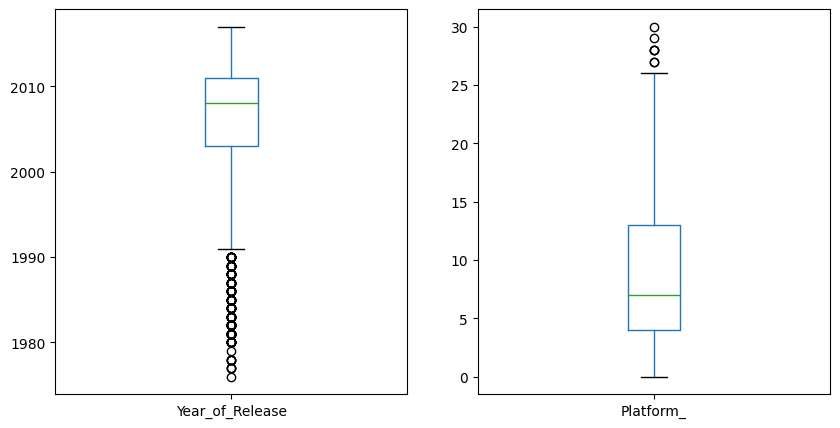

In [234]:
# Check distribution data by boxplot
# filter numeric column
feature = ['Year_of_Release','Platform_']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

# for 0 (i) , Income (el)
for i,el in enumerate(feature):
    a = dfcl.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

In [235]:
# Create variable of dataset frequency
dfcl_a = dfcl[['Year_of_Release','Platform_']]
dfcl_a

Year_of_Release  Platform_
0                 2006          0
1                 1985          1
2                 2008          0
3                 2009          0
4                 1996          2
...                ...        ...
17411             2007          3
17412             2007          3
17413             2002          6
17414             2009          6
17415             2007         16

[17416 rows x 2 columns]

<Axes: xlabel='Year_of_Release', ylabel='Platform_'>

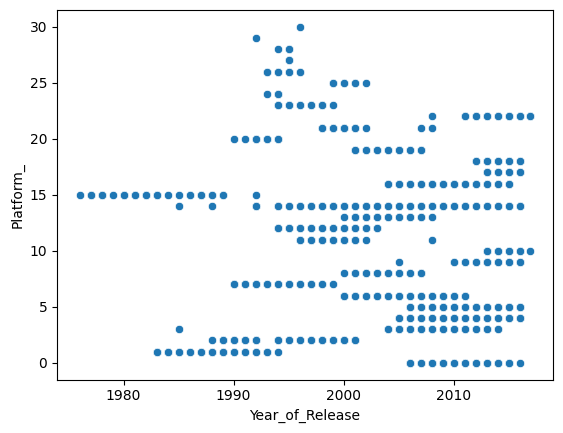

In [236]:
#Create scatter plot between index as user_id and frequency
sns.scatterplot(data = dfcl_a, x='Year_of_Release', y='Platform_')

In [237]:
dfcl_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Year_of_Release  17416 non-null  int64
 1   Platform_        17416 non-null  int64
dtypes: int64(2)
memory usage: 272.2 KB


In [238]:
# Define Standard Scale dataset
ss_scale_df = dfcl_a.copy()
column = ['Year_of_Release','Platform_']
# using StandardScaler Scaler
ss_scaler = StandardScaler()
ss_scale_df[column] = ss_scaler.fit_transform(ss_scale_df[column])

<Axes: xlabel='Year_of_Release', ylabel='Platform_'>

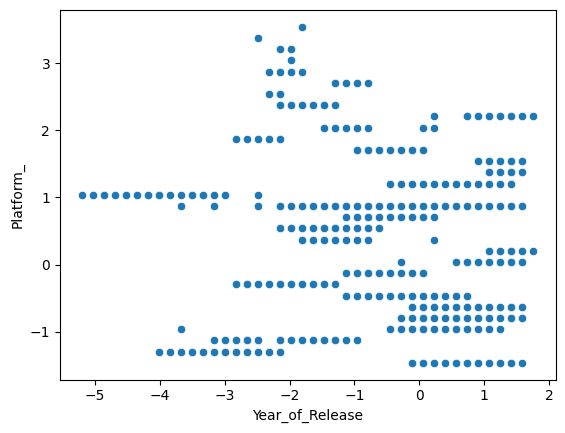

In [239]:
#Create scatter plot between index as user_id and frequency after scale
sns.scatterplot (data = ss_scale_df, x='Year_of_Release', y='Platform_')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

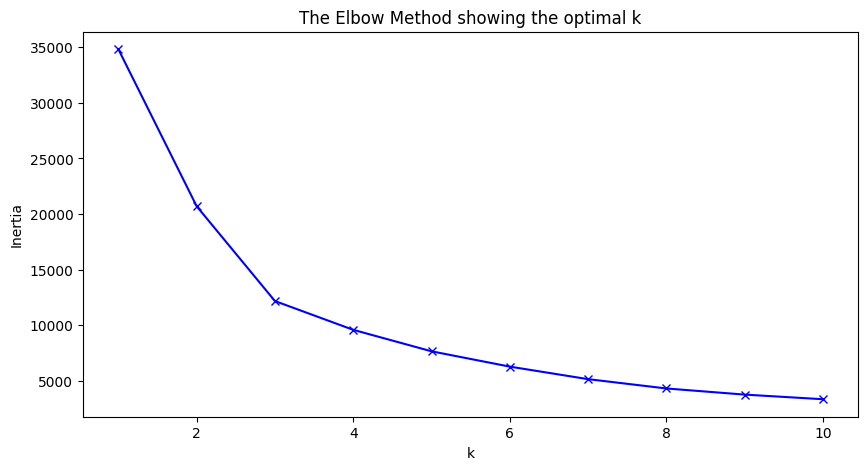

[34831.99999999993, 20702.904110845302, 12170.666544731026, 9581.340826865195, 7649.278634371987, 6269.929228763949, 5142.680715947161, 4304.612138116103, 3752.820416588488, 3337.2592234901213]


In [240]:
# K-Means Clustering by elbow method
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k,init='k-means++')
    kmeanModel.fit(ss_scale_df)  #---------------------Ini yang diganti
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
print(distortions)

In [241]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(12, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2 The average silhouette_score is : 0.39139172855861454


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 3 The average silhouette_score is : 0.480766500850755


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 4 The average silhouette_score is : 0.4676967245860783


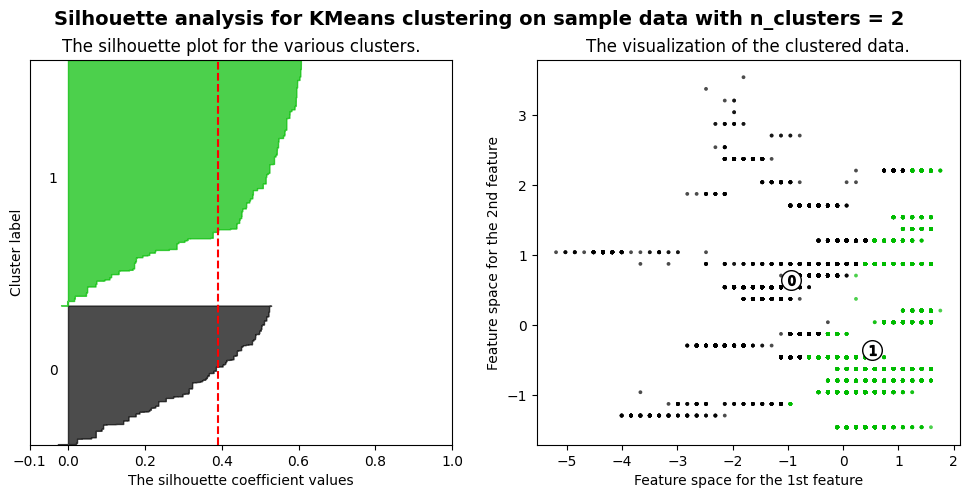

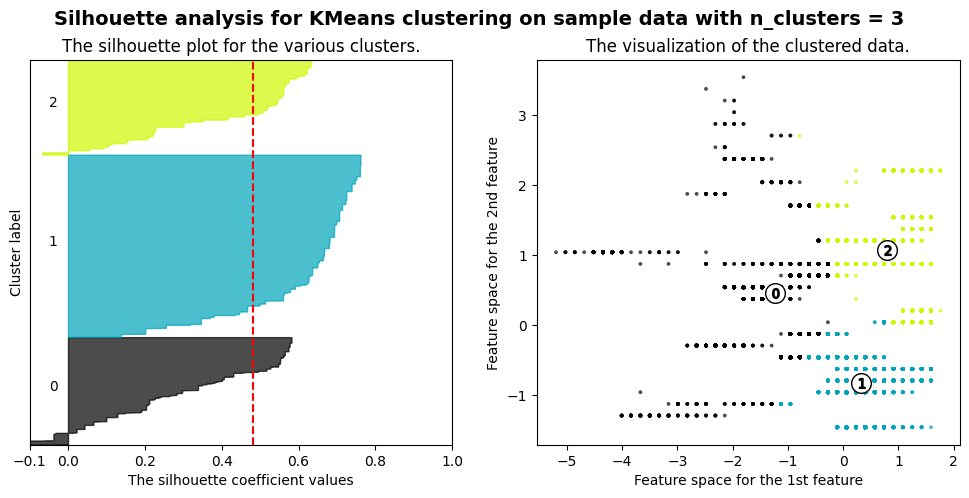

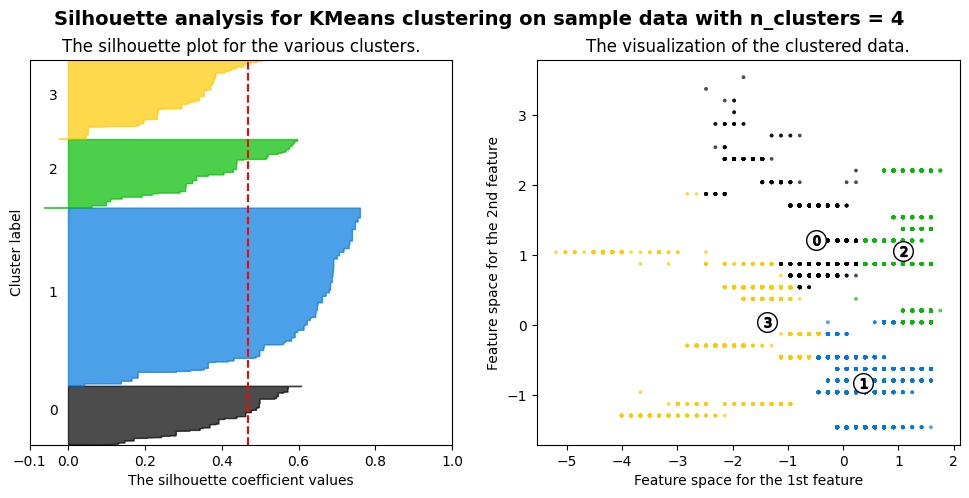

In [242]:
# Create silhoutte analysis of cluster 2-4 based on elbow method
silhoutte_analysis(ss_scale_df[['Year_of_Release', 'Platform_']],list(range(2,5))) 

## Forecasting

In [243]:
df_out = dfte.copy()
df_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17416 non-null  int64  
 3   Genre            17416 non-null  object 
 4   Publisher        17416 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
 15  Platform_        17416 non-null  int64  
 16  Genre_           17416 non-null  int64  
dtypes: float64(9

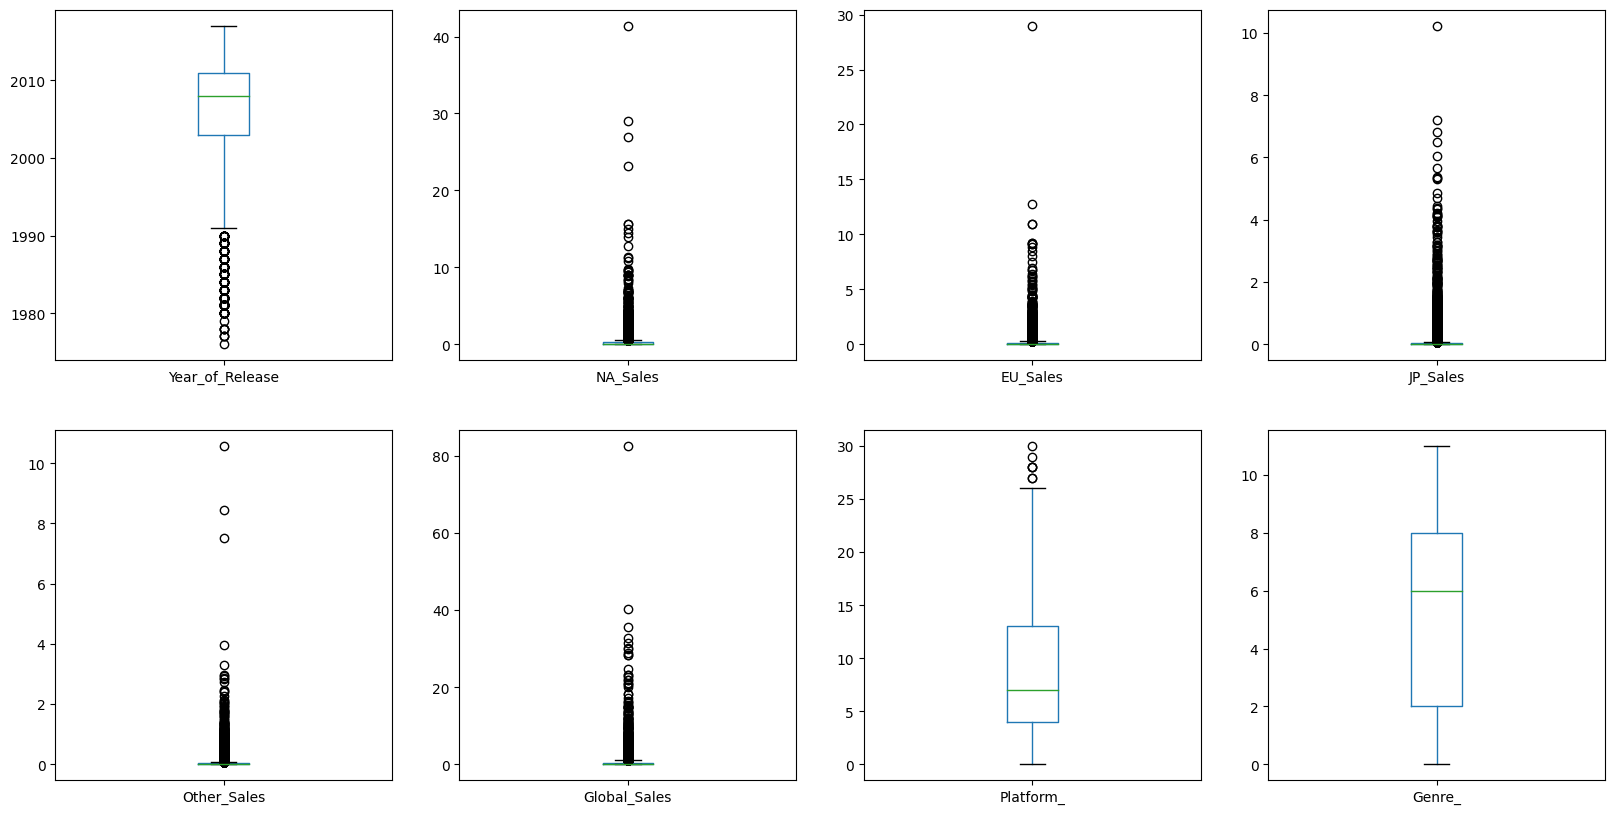

In [244]:
# Siapkan numerical column
numerical_column = ['Year_of_Release','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Platform_','Genre_']

# Ploting box plot
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))

for idx, kolom in enumerate(numerical_column):
  df_out.boxplot(kolom, ax =axes.flatten()[idx], grid = False)

plt.show()

In [245]:
from re import I
Q1 = df_out[['Global_Sales']].quantile(0.25)
Q3 = df_out[['Global_Sales']].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5*IQR 
boxplot_max = Q3 + 1.5*IQR 

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 Global_Sales    0.05
Name: 0.25, dtype: float64

Q3:
 Global_Sales    0.45
Name: 0.75, dtype: float64

IQR:
 Global_Sales    0.4
dtype: float64

Min:
 Global_Sales   -0.55
dtype: float64

Max:
 Global_Sales    1.05
dtype: float64


In [246]:
df_out2 = df_out[ (df_out['Global_Sales'] > -0.55) &  (df_out['Global_Sales'] < 1.05) ]
df_out2

Name Platform  \
1991                             Imagine: Animal Doctor       DS   
1992                                  MVP Baseball 2003      PS2   
1993                        Legacy of Kain: Soul Reaver       PS   
1994                         WWE SmackDown vs. Raw 2010     X360   
1995                                   Tales of Destiny       PS   
...                                                 ...      ...   
17411  Nancy Drew: The Deadly Secret of Olde World Park       DS   
17412                      Fashion Designer: Style Icon       DS   
17413            Ashita no Joe 2: The Anime Super Remix      PS2   
17414            NadePro!! Kisama no Seiyuu Yatte Miro!      PS2   
17415                     Brian Lara 2007 Pressure Play      PSP   

       Year_of_Release         Genre              Publisher  NA_Sales  \
1991              2007    Simulation                Ubisoft      0.45   
1992              2003        Sports        Electronic Arts      0.51   
1993              1999        Action      Eidos Interactive      0.58   
1994              2009      Fighting                    THQ      0.56   
1995              1997  Role-Playing     Namco Bandai Games      0.09   
...                ...           ...                    ...       ...   
17411             2007     Adventure  Majesco Entertainment      0.00   
17412             2007    Simulation              505 Games      0.00   
17413             2002      Fighting                 Capcom      0.00   
17414             2009     Adventure                 GungHo      0.00   
17415             2007        Sports            Codemasters      0.00   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
1991       0.48      0.00         0.11          1.04           NaN   
1992       0.40      0.00         0.13          1.04          81.0   
1993       0.40      0.00         0.07          1.04          91.0   
1994       0.37      0.01         0.10          1.04          80.0   
1995       0.06      0.83         0.07          1.04           NaN   
...         ...       ...          ...           ...           ...   
17411      0.00      0.00         0.00          0.01          64.0   
17412      0.00      0.00         0.00          0.01           NaN   
17413      0.00      0.01         0.00          0.01           NaN   
17414      0.00      0.01         0.00          0.01           NaN   
17415      0.00      0.00         0.00          0.01           NaN   

       Critic_Count  User_Score  User_Count Rating  Platform_  Genre_  
1991            NaN         7.4         5.0      E          3       7  
1992           22.0         8.9        17.0      E          6       0  
1993           17.0         9.0       133.0      T         12       8  
1994           59.0         8.4        36.0      T          4       9  
1995            NaN         NaN         NaN    NaN         12       3  
...             ...         ...         ...    ...        ...     ...  
17411           7.0         NaN         NaN      E          3      10  
17412           NaN         NaN         NaN    NaN          3       7  
17413           NaN         NaN         NaN    NaN          6       9  
17414           NaN         NaN         NaN    NaN          6      10  
17415           NaN         NaN         NaN    NaN         16       0  

[15425 rows x 17 columns]

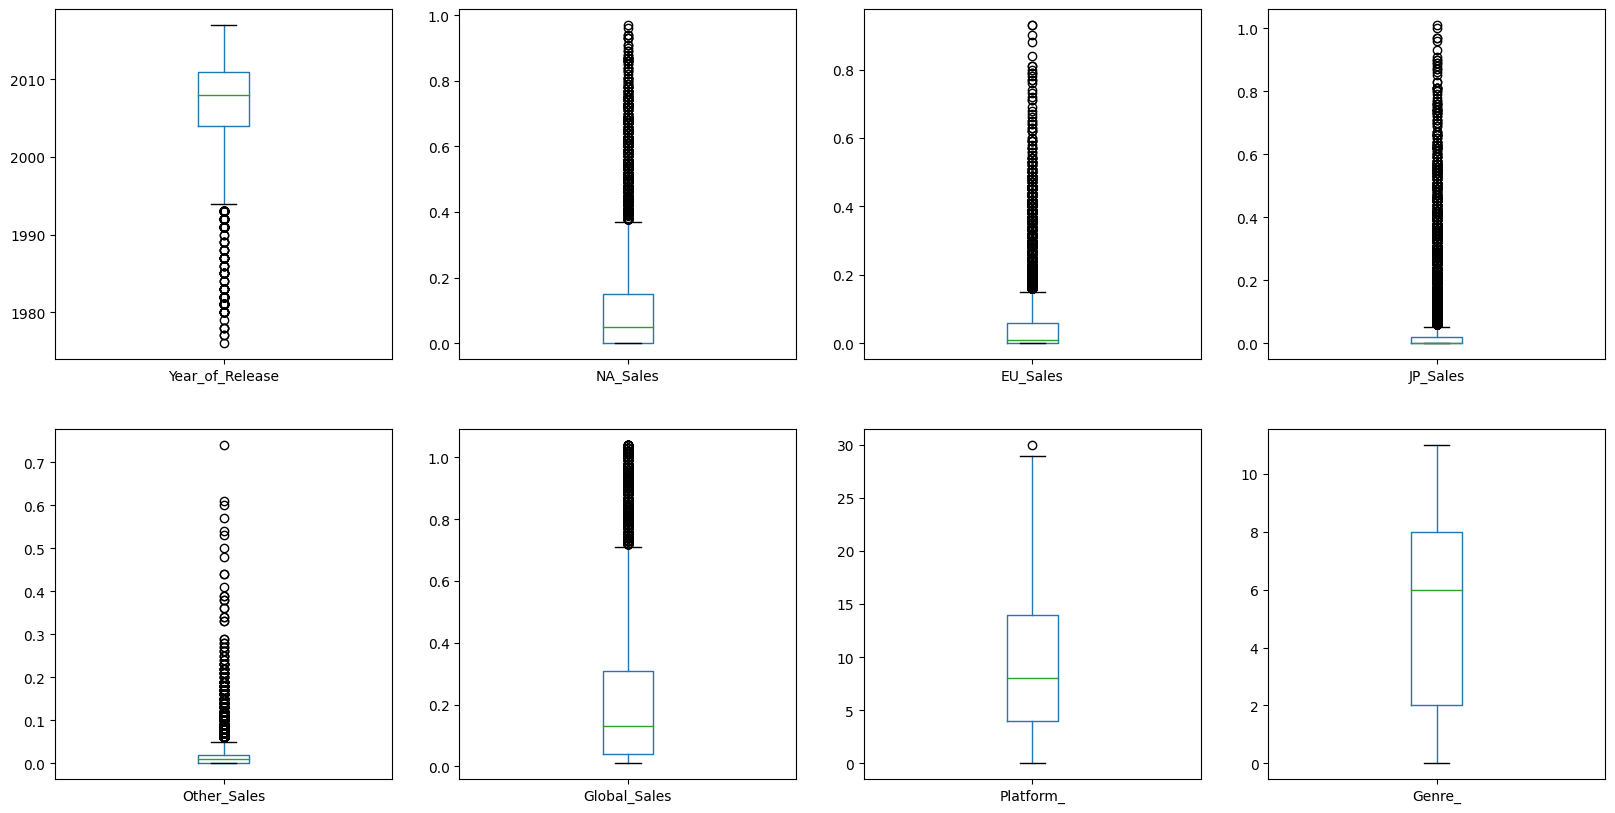

In [247]:
# Siapkan numerical column
numerical_column = ['Year_of_Release','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Platform_','Genre_']

# Ploting box plot
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))

for idx, kolom in enumerate(numerical_column):
  df_out2.boxplot(kolom, ax =axes.flatten()[idx], grid = False)

plt.show()

In [248]:
df_outlier = df_out2[ (df_out2['Global_Sales'] < -0.55) | (df_out2['Global_Sales'] > 1.05) ]
len(df_outlier)


0

In [249]:
# total seluruh data
len(df)

17416

In [250]:
# # Tiap genre ada ga sih outlier dari penjualan nya?

# fig,  axes = plt.subplots(nrows = 3, ncols = 4, figsize=(10,10))
# fig.tight_layout(pad = 3)

# for idx, genre in enumerate(range(1,46)):
#   # Pilih per genre
#   df_out[df_out['Genre'] == genre].boxplot(column = ['Global_Sales'], ax = axes.flatten()[idx], grid = False)

#   # Beri nama / title tiap boxplot 
#   title = 'Genre_ '+str(genre)
#   axes.flatten()[idx].set_title(title)
#   axes.flatten()[idx].xaxis.label.set_visible(False)

# plt.show()

In [251]:
# pilih genre action sebagai top genre pada genre_ 9
# sedikit outliers coba diabaikan dahulu
df_9 = df_out2[df_out2['Genre_'] == 9]
df_9

Name Platform  Year_of_Release  \
1994                WWE SmackDown vs. Raw 2010     X360             2009   
1999                  Naruto: Clash of Ninja 2       GC             2003   
2028                    Street Fighter Alpha 3       PS             1998   
2035        Dragon Ball Z: Budokai Tenkaichi 3      Wii             2007   
2053         Naruto: Clash of Ninja Revolution      Wii             2007   
...                                        ...      ...              ...   
17138  Majin Bone: The Majin of Space and Time      3DS             2014   
17163                  Jojos Bizarre Adventure      PS3             2012   
17213                  Zatch Bell! Mamodo Fury      PS2             2005   
17352                           SoulCalibur IV     X360             2008   
17413   Ashita no Joe 2: The Anime Super Remix      PS2             2002   

          Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
1994   Fighting                 THQ      0.56      0.37      0.01   
1999   Fighting            Nintendo      0.44      0.12      0.45   
2028   Fighting  Virgin Interactive      0.38      0.12      0.51   
2035   Fighting               Atari      0.32      0.36      0.26   
2053   Fighting    Tomy Corporation      0.44      0.46      0.00   
...         ...                 ...       ...       ...       ...   
17138  Fighting  Namco Bandai Games      0.00      0.00      0.01   
17163  Fighting  Virgin Interactive      0.00      0.01      0.00   
17213  Fighting  Namco Bandai Games      0.00      0.00      0.00   
17352  Fighting  Namco Bandai Games      0.00      0.00      0.00   
17413  Fighting              Capcom      0.00      0.00      0.01   

       Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  \
1994          0.10          1.04          80.0          59.0         8.4   
1999          0.03          1.04          74.0          22.0         8.9   
2028          0.02          1.03          93.0          12.0         8.5   
2035          0.09          1.02          72.0          27.0         8.4   
2053          0.11          1.01          74.0          23.0         8.0   
...            ...           ...           ...           ...         ...   
17138         0.00          0.01           NaN           NaN         NaN   
17163         0.00          0.01           NaN           NaN         NaN   
17213         0.00          0.01           NaN           NaN         NaN   
17352         0.00          0.01          85.0          62.0         7.9   
17413         0.00          0.01           NaN           NaN         NaN   

       User_Count Rating  Platform_  Genre_  
1994         36.0      T          4       9  
1999         39.0      T         19       9  
2028         46.0      T         12       9  
2035         61.0      T          0       9  
2053         27.0      T          0       9  
...           ...    ...        ...     ...  
17138         NaN    NaN          9       9  
17163         NaN    NaN          5       9  
17213         NaN    NaN          6       9  
17352       158.0      T          4       9  
17413         NaN    NaN          6       9  

[746 rows x 17 columns]

In [252]:
df_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 1994 to 17413
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             746 non-null    object 
 1   Platform         746 non-null    object 
 2   Year_of_Release  746 non-null    int64  
 3   Genre            746 non-null    object 
 4   Publisher        746 non-null    object 
 5   NA_Sales         746 non-null    float64
 6   EU_Sales         746 non-null    float64
 7   JP_Sales         746 non-null    float64
 8   Other_Sales      746 non-null    float64
 9   Global_Sales     746 non-null    float64
 10  Critic_Score     348 non-null    float64
 11  Critic_Count     348 non-null    float64
 12  User_Score       338 non-null    float64
 13  User_Count       338 non-null    float64
 14  Rating           377 non-null    object 
 15  Platform_        746 non-null    int64  
 16  Genre_           746 non-null    int64  
dtypes: float64(

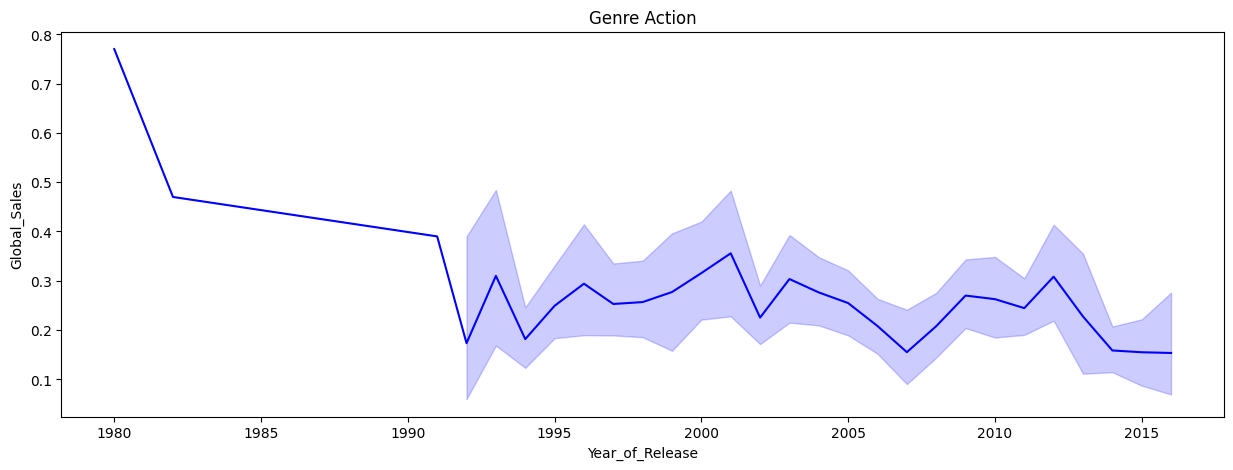

In [253]:
#Check visualization
fig = plt.figure(figsize = (15,5))

ax = fig.add_subplot(1,1,1)
ax.set_title('Genre Action')

sns.lineplot(data = df_9, x = 'Year_of_Release', y = 'Global_Sales', ax = ax, color = 'blue' )

plt.show()

In [254]:
df_9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 1994 to 17413
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             746 non-null    object 
 1   Platform         746 non-null    object 
 2   Year_of_Release  746 non-null    int64  
 3   Genre            746 non-null    object 
 4   Publisher        746 non-null    object 
 5   NA_Sales         746 non-null    float64
 6   EU_Sales         746 non-null    float64
 7   JP_Sales         746 non-null    float64
 8   Other_Sales      746 non-null    float64
 9   Global_Sales     746 non-null    float64
 10  Critic_Score     348 non-null    float64
 11  Critic_Count     348 non-null    float64
 12  User_Score       338 non-null    float64
 13  User_Count       338 non-null    float64
 14  Rating           377 non-null    object 
 15  Platform_        746 non-null    int64  
 16  Genre_           746 non-null    int64  
dtypes: float64(

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



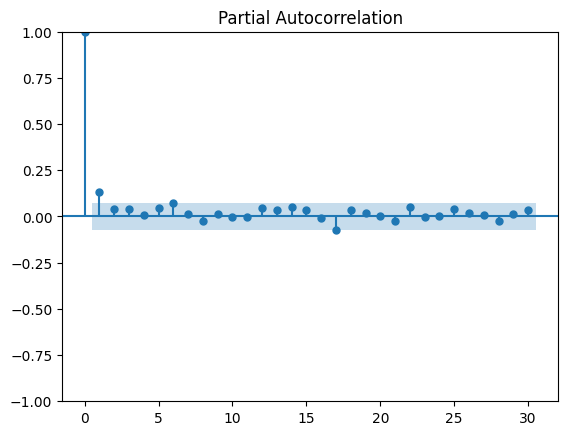

In [255]:
# autocorrelation ada di library statmodel
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(df_9['Year_of_Release'], lags = 30)
plt.show()

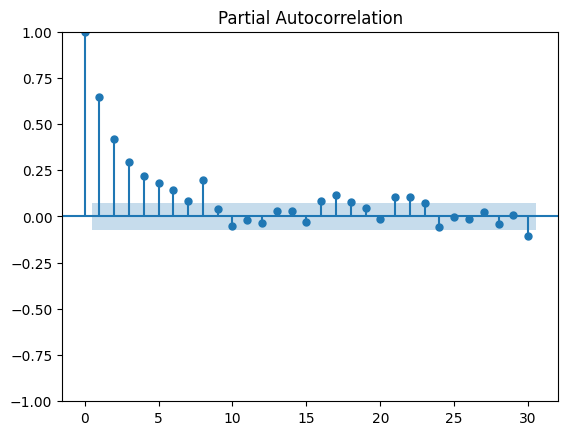

In [256]:
sm.graphics.tsa.plot_pacf(df_9['NA_Sales'], lags = 30)
plt.show()

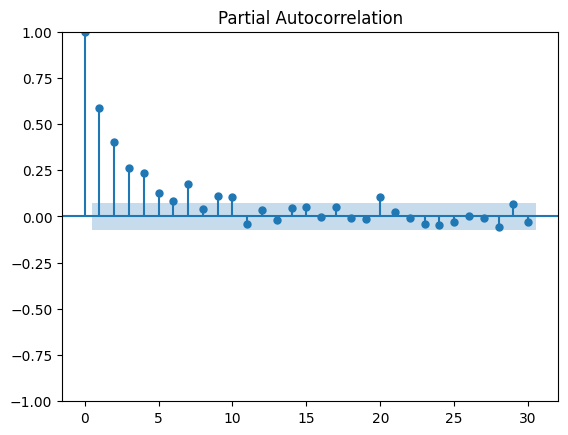

In [257]:
sm.graphics.tsa.plot_pacf(df_9['EU_Sales'], lags = 30)
plt.show()

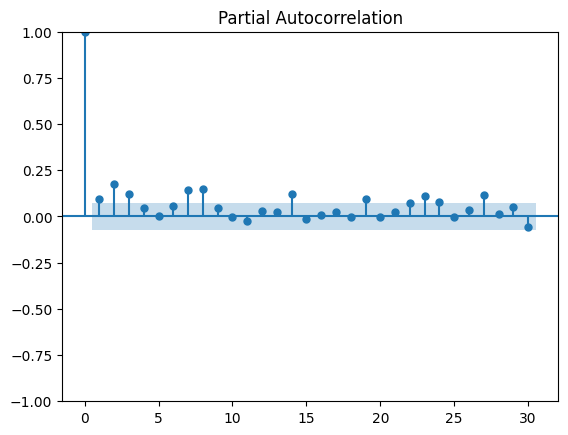

In [258]:
sm.graphics.tsa.plot_pacf(df_9['JP_Sales'], lags = 30)
plt.show()

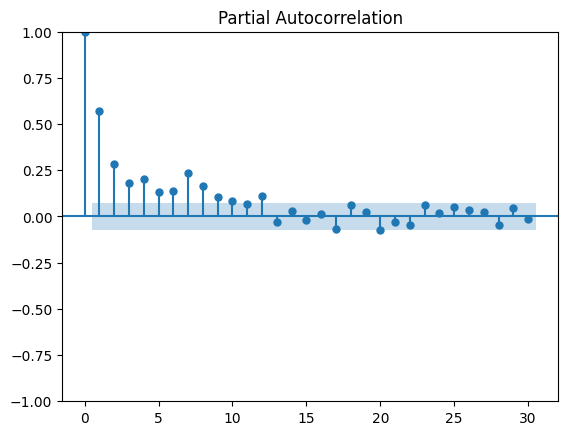

In [259]:
sm.graphics.tsa.plot_pacf(df_9['Other_Sales'], lags = 30)
plt.show()

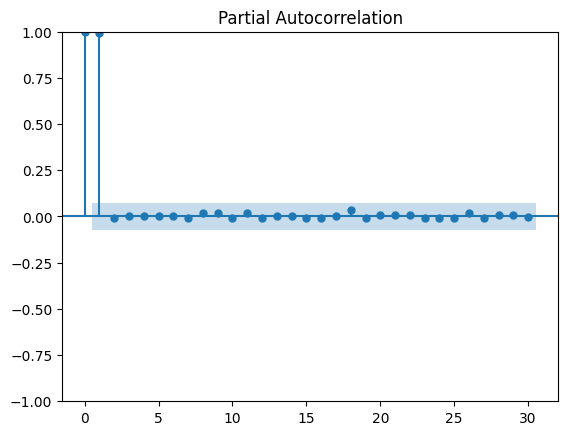

In [260]:
sm.graphics.tsa.plot_pacf(df_9['Global_Sales'], lags = 30)
plt.show()

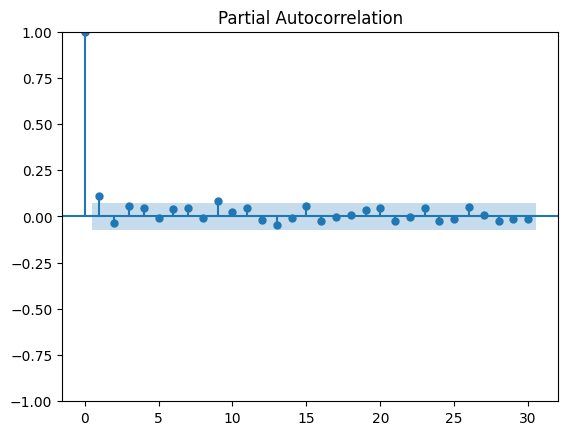

In [261]:
sm.graphics.tsa.plot_pacf(df_9['Platform_'], lags = 30)
plt.show()

In [262]:
# Order df_fc
df_9c = df_9.sort_values(['Year_of_Release']).copy()

# Day dummies
df_9c['Year'] = df_9c['Year_of_Release']
df_9c = pd.get_dummies(df_9c, drop_first = True)

# Set Date as index
df_9c = df_9c.set_index(['Year_of_Release'])
df_9c

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
Year_of_Release                                                            
1980                 0.72      0.04      0.00         0.01          0.77   
1982                 0.44      0.03      0.00         0.00          0.47   
1991                 0.00      0.00      0.39         0.00          0.39   
1992                 0.00      0.00      0.06         0.00          0.06   
1992                 0.04      0.01      0.02         0.00          0.07   
...                   ...       ...       ...          ...           ...   
2016                 0.00      0.00      0.03         0.00          0.03   
2016                 0.09      0.02      0.05         0.02          0.18   
2016                 0.12      0.17      0.08         0.06          0.42   
2016                 0.00      0.00      0.01         0.00          0.01   
2016                 0.23      0.07      0.00         0.03          0.33   

                 Critic_Score  Critic_Count  User_Score  User_Count  \
Year_of_Release                                                       
1980                      NaN           NaN         NaN         NaN   
1982                      NaN           NaN         NaN         NaN   
1991                      NaN           NaN         NaN         NaN   
1992                      NaN           NaN         NaN         NaN   
1992                      NaN           NaN         NaN         NaN   
...                       ...           ...         ...         ...   
2016                      NaN           NaN         NaN         NaN   
2016                     79.0          54.0         8.5       212.0   
2016                     66.0          45.0         7.8        50.0   
2016                     82.0          18.0         7.6        26.0   
2016                     81.0          11.0         8.5        52.0   

                 Platform_  ...  Publisher_Virgin Interactive  \
Year_of_Release             ...                                 
1980                    15  ...                             0   
1982                    15  ...                             0   
1991                     7  ...                             0   
1992                     7  ...                             0   
1992                     1  ...                             0   
...                    ...  ...                           ...   
2016                     9  ...                             0   
2016                    10  ...                             0   
2016                    10  ...                             0   
2016                    10  ...                             0   
2016                    17  ...                             0   

                 Publisher_Vivendi Games  \
Year_of_Release                            
1980                                   0   
1982                                   0   
1991                                   0   
1992                                   0   
1992                                   0   
...                                  ...   
2016                                   0   
2016                                   0   
2016                                   0   
2016                                   0   
2016                                   0   

                 Publisher_Warner Bros. Interactive Entertainment  \
Year_of_Release                                                     
1980                                                            0   
1982                                                            0   
1991                                                            0   
1992                                                            0   
1992                                                            0   
...                                                           ...   
2016                                                            0   
2016                                                            

In [263]:
# Lag Variable

# df_9c['lag1_Year_of_Release'] = df_9c['Year_of_Release'].shift(1)

df_9c['lag1_NA_Sales'] = df_9c['NA_Sales'].shift(1)
df_9c['lag2_NA_Sales'] = df_9c['NA_Sales'].shift(2)
df_9c['lag2_NA_Sales'] = df_9c['NA_Sales'].shift(3)
df_9c['lag2_NA_Sales'] = df_9c['NA_Sales'].shift(4)
df_9c['lag2_NA_Sales'] = df_9c['NA_Sales'].shift(5)
df_9c['lag2_NA_Sales'] = df_9c['NA_Sales'].shift(6)

df_9c['lag2_EU_Sales'] = df_9c['EU_Sales'].shift(1)
df_9c['lag2_EU_Sales'] = df_9c['EU_Sales'].shift(2)
df_9c['lag2_EU_Sales'] = df_9c['EU_Sales'].shift(3)
df_9c['lag2_EU_Sales'] = df_9c['EU_Sales'].shift(4)
df_9c['lag2_EU_Sales'] = df_9c['EU_Sales'].shift(5)

# df_9c['lag2_JP_Sales'] = df_9c['JP_Sales'].shift(1)
# df_9c['lag2_JP_Sales'] = df_9c['JP_Sales'].shift(2)
# df_9c['lag2_JP_Sales'] = df_9c['JP_Sales'].shift(3)

df_9c['lag2_Other_Sales'] = df_9c['Other_Sales'].shift(1)
df_9c['lag2_Other_Sales'] = df_9c['Other_Sales'].shift(2)
df_9c['lag2_Other_Sales'] = df_9c['Other_Sales'].shift(3)
df_9c['lag2_Other_Sales'] = df_9c['Other_Sales'].shift(4)
df_9c['lag2_Other_Sales'] = df_9c['Other_Sales'].shift(5)
df_9c['lag2_Other_Sales'] = df_9c['Other_Sales'].shift(6)
df_9c['lag2_Other_Sales'] = df_9c['Other_Sales'].shift(7)
df_9c['lag2_Other_Sales'] = df_9c['Other_Sales'].shift(8)

# df_9c['lag2_Global_Sales'] = df_9c['Global_Sales'].shift(1)
# df_9c['lag2_Global_Sales'] = df_9c['Global_Sales'].shift(2)
# df_9c['lag2_Global_Sales'] = df_9c['Global_Sales'].shift(3)

df_9c['lag2_Platform_'] = df_9c['Platform_'].shift(1)


In [264]:
# Pilih Kolom untuk forecasting
df_forecast = df_9c.copy()

#  Remove NA
df_forecast = df_forecast[~df_forecast.isna().any(axis=1)] #jangan pilih baris yg ada NA nya

df_forecast.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Platform_',
       ...
       'Publisher_Yukes', 'Publisher_Zoo Digital Publishing', 'Rating_E10+',
       'Rating_M', 'Rating_T', 'lag1_NA_Sales', 'lag2_NA_Sales',
       'lag2_EU_Sales', 'lag2_Other_Sales', 'lag2_Platform_'],
      dtype='object', length=706)

In [265]:
df_forecast.head(2)

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
Year_of_Release                                                            
1998                 0.38      0.12      0.51         0.02          1.03   
1998                 0.13      0.09      0.00         0.02          0.23   

                 Critic_Score  Critic_Count  User_Score  User_Count  \
Year_of_Release                                                       
1998                     93.0          12.0         8.5        46.0   
1998                     61.0           4.0         7.8         4.0   

                 Platform_  ...  Publisher_Yukes  \
Year_of_Release             ...                    
1998                    12  ...                0   
1998                    12  ...                0   

                 Publisher_Zoo Digital Publishing  Rating_E10+  Rating_M  \
Year_of_Release                                                            
1998                                            0            0         0   
1998                                            0            0         0   

                 Rating_T  lag1_NA_Sales  lag2_NA_Sales  lag2_EU_Sales  \
Year_of_Release                                                          
1998                    1           0.00           0.13           0.00   
1998                    1           0.15           0.14           0.06   

                 lag2_Other_Sales  lag2_Platform_  
Year_of_Release                                    
1998                          0.0            12.0  
1998                          0.0            12.0  

[2 rows x 706 columns]

In [266]:
# Data for forecasting
x = df_forecast[['Year','Genre_','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
                'Platform_','lag1_NA_Sales', 'lag2_NA_Sales',
                'lag2_EU_Sales', 'lag2_Other_Sales',
                'lag2_Platform_'
                ]]

y = df_forecast[['Global_Sales']]

# To test the accuracy of our forecast, let's only train the model until June 2012 and see forecast from it forward
x_train = x[x.index < 2000]
x_test  = x[x.index >= 2000]

y_train = y[y.index < 2000]
y_test  = y[y.index >= 2000]

In [267]:
# x_train.fillna(0, inplace=True)
# x_train.info()

In [268]:
# x.fillna(0,inplace=True)
# x.info()

In [269]:
x_train

Year  Genre_  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release                                                            
1998             1998       9      0.38      0.12      0.51         0.02   
1998             1998       9      0.13      0.09      0.00         0.02   
1998             1998       9      0.09      0.06      0.10         0.02   
1999             1999       9      0.00      0.00      0.34         0.00   
1999             1999       9      0.06      0.04      0.00         0.01   

                 Platform_  lag1_NA_Sales  lag2_NA_Sales  lag2_EU_Sales  \
Year_of_Release                                                           
1998                    12           0.00           0.13           0.00   
1998                    12           0.15           0.14           0.06   
1998                    12           0.00           0.00           0.07   
1999                    21           0.01           0.23           0.30   
1999                    12           0.00           0.43           0.00   

                 lag2_Other_Sales  lag2_Platform_  
Year_of_Release                                    
1998                         0.00            12.0  
1998                         0.00            12.0  
1998                         0.02            12.0  
1999                         0.00            12.0  
1999                         0.01            21.0

In [270]:
from sklearn.linear_model import LinearRegression # model lin. reg

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [271]:
model.score(x_train,y_train)

1.0

In [272]:
# Create prediction for whole sample
df_prediction = y.copy()
df_prediction['Predicted'] = model.predict(x)
df_prediction

Global_Sales  Predicted
Year_of_Release                         
1998                     1.03   1.030000
1998                     0.23   0.230000
1998                     0.28   0.280000
1999                     0.34   0.340000
1999                     0.11   0.110000
...                       ...        ...
2016                     0.11  -0.073168
2016                     0.18   0.325892
2016                     0.42   0.389482
2016                     0.01   0.194633
2016                     0.33   0.249044

[323 rows x 2 columns]

In [273]:
# Combine result to original data
df_fc_pred = df_9c.merge(df_prediction, how='left', left_index = True, right_index = True)
df_fc_pred

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales_x  \
Year_of_Release                                                              
1980                 0.72      0.04      0.00         0.01            0.77   
1982                 0.44      0.03      0.00         0.00            0.47   
1991                 0.00      0.00      0.39         0.00            0.39   
1992                 0.00      0.00      0.06         0.00            0.06   
1992                 0.04      0.01      0.02         0.00            0.07   
...                   ...       ...       ...          ...             ...   
2016                 0.23      0.07      0.00         0.03            0.33   
2016                 0.23      0.07      0.00         0.03            0.33   
2016                 0.23      0.07      0.00         0.03            0.33   
2016                 0.23      0.07      0.00         0.03            0.33   
2016                 0.23      0.07      0.00         0.03            0.33   

                 Critic_Score  Critic_Count  User_Score  User_Count  \
Year_of_Release                                                       
1980                      NaN           NaN         NaN         NaN   
1982                      NaN           NaN         NaN         NaN   
1991                      NaN           NaN         NaN         NaN   
1992                      NaN           NaN         NaN         NaN   
1992                      NaN           NaN         NaN         NaN   
...                       ...           ...         ...         ...   
2016                     81.0          11.0         8.5        52.0   
2016                     81.0          11.0         8.5        52.0   
2016                     81.0          11.0         8.5        52.0   
2016                     81.0          11.0         8.5        52.0   
2016                     81.0          11.0         8.5        52.0   

                 Platform_  ...  Rating_E10+  Rating_M  Rating_T  \
Year_of_Release             ...                                    
1980                    15  ...            0         0         0   
1982                    15  ...            0         0         0   
1991                     7  ...            0         0         0   
1992                     7  ...            0         0         0   
1992                     1  ...            0         0         0   
...                    ...  ...          ...       ...       ...   
2016                    17  ...            0         0         1   
2016                    17  ...            0         0         1   
2016                    17  ...            0         0         1   
2016                    17  ...            0         0         1   
2016                    17  ...            0         0         1   

                 lag1_NA_Sales  lag2_NA_Sales  lag2_EU_Sales  \
Year_of_Release                                                
1980                       NaN            NaN            NaN   
1982                      0.72            NaN            NaN   
1991                      0.44            NaN            NaN   
1992                      0.00            NaN            NaN   
1992                      0.00            NaN            NaN   
...                        ...            ...            ...   
2016                      0.00           0.04           0.02   
2016                      0.00           0.04           0.02   
2016                      0.00           0.04           0.02   
2016                      0.00           0.04           0.02   
2016                      0.00           0.04           0.02   

                 lag2_Other_Sales  lag2_Platform_  Global_Sales_y  Predicted  
Year_of_Release                                                               
1980                          NaN             NaN             NaN        NaN  
1982                          NaN            15.0             NaN        NaN  
1991                          NaN           

<Axes: xlabel='Year_of_Release'>

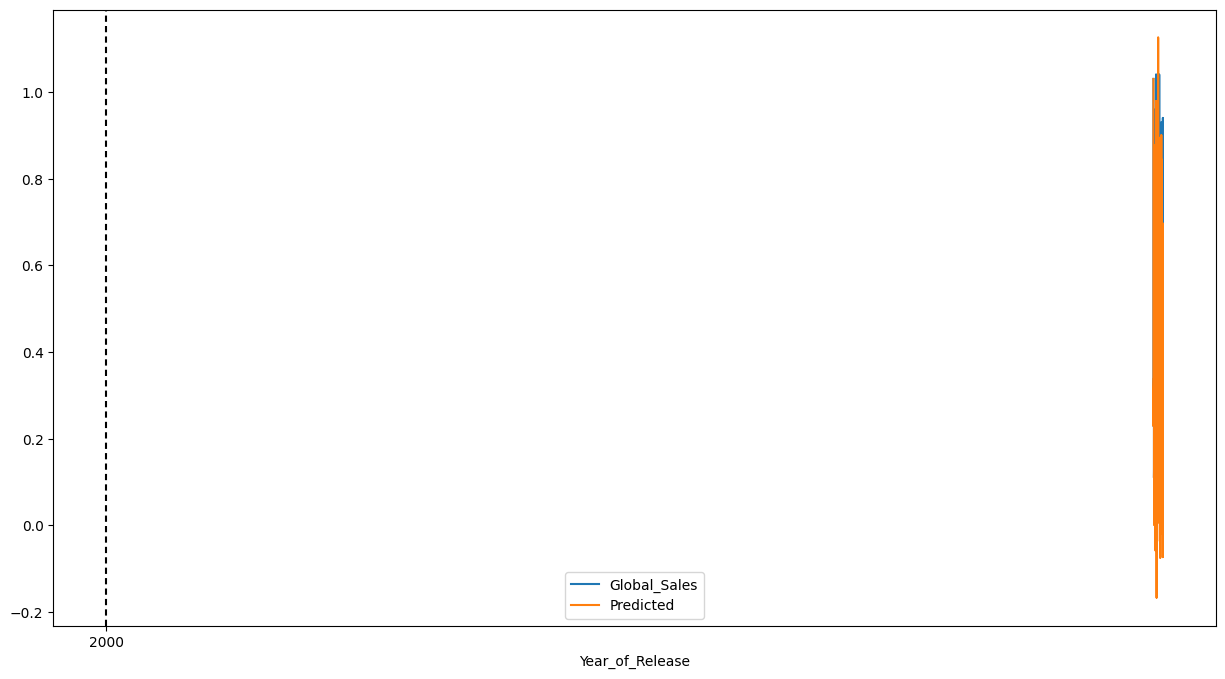

In [274]:
fig = df_prediction.plot(kind = 'line', figsize= (15,8))
# buat garis vertical
fig.axvline(x = '2000', color = 'black', dashes = (3,2))
fig

## Correlation

In [275]:
df_cor = dfte.copy()

In [276]:
df_cor.corr()

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.097040  0.000756 -0.166263     0.033806   
NA_Sales               -0.097040  1.000000  0.765520  0.451668     0.640798   
EU_Sales                0.000756  0.765520  1.000000  0.436560     0.725495   
JP_Sales               -0.166263  0.451668  0.436560  1.000000     0.293111   
Other_Sales             0.033806  0.640798  0.725495  0.293111     1.000000   
Global_Sales           -0.079676  0.941072  0.901681  0.613325     0.751348   
Critic_Score            0.010814  0.241139  0.220343  0.152174     0.198686   
Critic_Count            0.214868  0.299011  0.280763  0.182793     0.255152   
User_Score             -0.266821  0.085027  0.054562  0.125728     0.056474   
User_Count              0.174309  0.247640  0.285077  0.076720     0.241878   
Platform_              -0.095694 -0.087559 -0.069111 -0.047788    -0.082997   
Genre_                  0.136883 -0.065118 -0.051957 -0.055332    -0.044574   

                 Global_Sales  Critic_Score  Critic_Count  User_Score  \
Year_of_Release     -0.079676      0.010814      0.214868   -0.266821   
NA_Sales             0.941072      0.241139      0.299011    0.085027   
EU_Sales             0.901681      0.220343      0.280763    0.054562   
JP_Sales             0.613325      0.152174      0.182793    0.125728   
Other_Sales          0.751348      0.198686      0.255152    0.056474   
Global_Sales         1.000000      0.245523      0.307431    0.087241   
Critic_Score         0.245523      1.000000      0.424108    0.582705   
Critic_Count         0.307431      0.424108      1.000000    0.193619   
User_Score           0.087241      0.582705      0.193619    1.000000   
User_Count           0.266895      0.264277      0.361092    0.028059   
Platform_           -0.087942      0.143254     -0.071945    0.093179   
Genre_              -0.067480     -0.078783      0.090793    0.005798   

                 User_Count  Platform_    Genre_  
Year_of_Release    0.174309  -0.095694  0.136883  
NA_Sales           0.247640  -0.087559 -0.065118  
EU_Sales           0.285077  -0.069111 -0.051957  
JP_Sales           0.076720  -0.047788 -0.055332  
Other_Sales        0.241878  -0.082997 -0.044574  
Global_Sales       0.266895  -0.087942 -0.067480  
Critic_Score       0.264277   0.143254 -0.078783  
Critic_Count       0.361092  -0.071945  0.090793  
User_Score         0.028059   0.093179  0.005798  
User_Count         1.000000   0.076099  0.055205  
Platform_          0.076099   1.000000  0.070411  
Genre_             0.055205   0.070411  1.000000

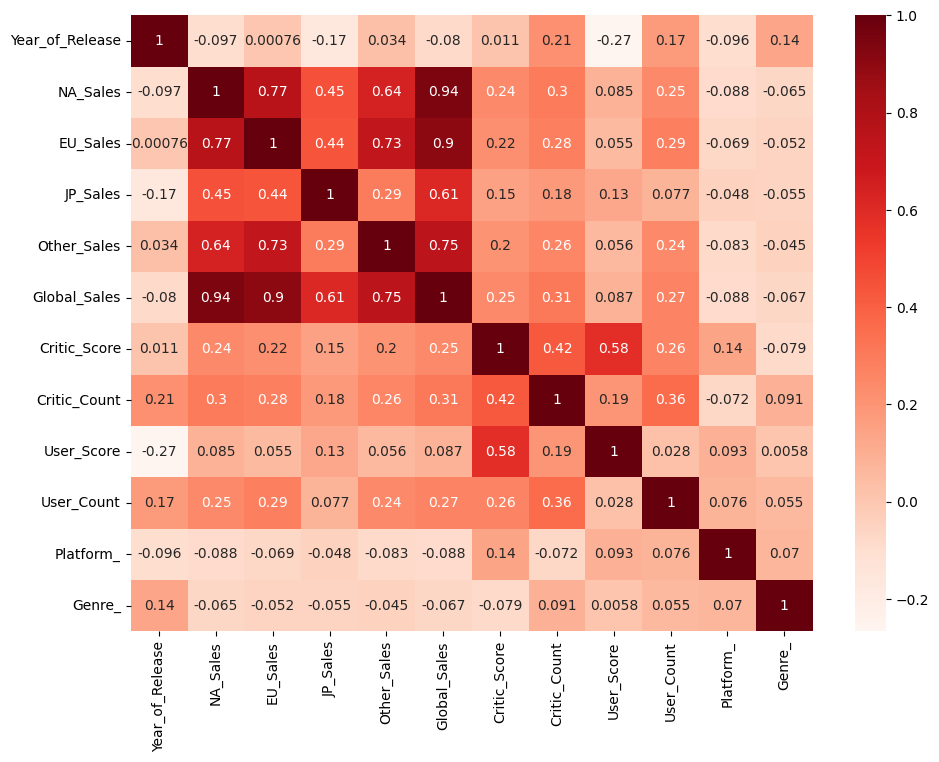

In [277]:
corr = df_cor.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Reds",annot=True)
plt.show()